# Lending Club Case Study

##### This case study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

##### Borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

##### To analyse this we have the complete loan data for all loans issued through the time period 2007 to 2011 and its Data Dictionary. 

### 1. Import required libraries

In [1726]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Read data

In [1727]:
# Read Data dictionary
DataDict = pd.read_excel("Data_Dictionary.xlsx")
DataDict.shape

(117, 2)

In [1728]:
# Read Loan data
LoanDf = pd.read_csv("loan.csv", low_memory=False)
LoanDf.shape

(39717, 111)

##### Display first five records

In [1729]:
LoanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### Get the information about each columns of the dataframe

In [1730]:
LoanDf.info(verbose=True,show_counts=True)

# Observation
# We see that there are many columns with complete null values like "tot_coll_amt", "tot_cur_bal" etc
# We also see that there are three types of columns
# 1. Demographic variables like "emp_length", "annual_inc" etc
# 2. Loan characteristics variables like "int_rate", "loan_status" etc
# 3. Customer behavior variables like "total_acc", "total_pymnt" etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### 3. Data cleaning

##### Find columns which has only null values and drop them

In [1731]:
col_with_no_val = list(LoanDf.columns[LoanDf.isnull().all()])
print("Number of columns which has no values = ",len(col_with_no_val))
print("Columns with Null values \n",col_with_no_val)

LoanDf.drop(columns=col_with_no_val, inplace=True)
print("\nShape = ",LoanDf.shape)

Number of columns which has no values =  54
Columns with Null values 
 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_c

##### Find the percentage of null values in each column

In [1732]:
LoanDf.isnull().sum() / len(LoanDf) * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


##### Find columns with more than 90% null values and drop them

In [1733]:
col_with_90_per_no_val = list(LoanDf.columns[LoanDf.isnull().sum() / len(LoanDf) * 100 > 90])
print(DataDict[DataDict["LoanStatNew"].isin(col_with_90_per_no_val)])

LoanDf.drop(columns=col_with_90_per_no_val, inplace=True)
print(LoanDf.shape)

               LoanStatNew                                        Description
52  mths_since_last_record  The number of months since the last public rec...
58            next_pymnt_d                        Next scheduled payment date
(39717, 55)


##### Drop columns with Customer Behaviour variables
Value of these variables are not available at the time of loan application and hence they do not help in predicting whether a loan will be default or not.

Example of such columns are:
- delinq_2yrs
- earliest_cr_line
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- revol_util
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

In [1734]:
LoanDf.drop(columns=["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"], inplace=True)
LoanDf.shape

(39717, 34)

##### Drop additional columns which do not add value to our analysis

In [1735]:
# Column "pymnt_plan"
print(LoanDf["pymnt_plan"].value_counts())

# It has only one value i.e "n". Hence it can be dropped
LoanDf.drop(columns="pymnt_plan", inplace=True)
LoanDf.shape

n    39717
Name: pymnt_plan, dtype: int64


(39717, 33)

In [1736]:
# Column "url"
print(LoanDf["url"].head())

# It does not have any valuable information for our analysis. Hence can be dropped
LoanDf.drop(columns="url", inplace=True)
LoanDf.shape

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
2    https://lendingclub.com/browse/loanDetail.acti...
3    https://lendingclub.com/browse/loanDetail.acti...
4    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object


(39717, 32)

In [1737]:
# Column "collections_12_mths_ex_med"
print(LoanDf["collections_12_mths_ex_med"].value_counts())

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="collections_12_mths_ex_med", inplace=True)
LoanDf.shape

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


(39717, 31)

In [1738]:
# Column "policy_code"
print(LoanDf["policy_code"].value_counts())

# It has only one value i.e "1". Hence it can be dropped
LoanDf.drop(columns="policy_code", inplace=True)
LoanDf.shape

1    39717
Name: policy_code, dtype: int64


(39717, 30)

In [1739]:
# Column "acc_now_delinq"
print(LoanDf["acc_now_delinq"].value_counts())

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="acc_now_delinq", inplace=True)
LoanDf.shape

0    39717
Name: acc_now_delinq, dtype: int64


(39717, 29)

In [1740]:
# Column "chargeoff_within_12_mths"
print(LoanDf["chargeoff_within_12_mths"].value_counts())

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="chargeoff_within_12_mths", inplace=True)
LoanDf.shape

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64


(39717, 28)

In [1741]:
# Column "delinq_amnt"
print(LoanDf["delinq_amnt"].value_counts())

# It has only value "0". Hence it can be dropped
LoanDf.drop(columns="delinq_amnt", inplace=True)
LoanDf.shape

0    39717
Name: delinq_amnt, dtype: int64


(39717, 27)

In [1742]:
# Column "tax_liens"
print(LoanDf["tax_liens"].value_counts())

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="tax_liens", inplace=True)
LoanDf.shape

0.0    39678
Name: tax_liens, dtype: int64


(39717, 26)

##### There are few more columns which do not add value to our analysis
- member_id
- emp_title
- desc
- title
- zip_code
- initial_list_status
- mths_since_last_delinq

In [1743]:
LoanDf.drop(columns=["member_id","emp_title","desc", "title", "zip_code","initial_list_status", "mths_since_last_delinq"], inplace=True)
LoanDf.shape

(39717, 19)

##### Delete duplicate rows and rows related to Current loan status 

In [1744]:
# Drop Duplicate rows
LoanDf.drop_duplicates(inplace=True)
LoanDf.shape

(39717, 19)

In [1745]:
# Drop rows with Current loan status (Write Explanation)
LoanDf = LoanDf[~(LoanDf["loan_status"] == 'Current')]
print(LoanDf["loan_status"].value_counts())
LoanDf.shape

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


(38577, 19)

##### Fill partial missing values using business judgement

In [1746]:
# Determine which all columns have Null values
LoanDf[LoanDf.columns[LoanDf.isnull().sum() > 0]].isnull().sum()

emp_length              1033
pub_rec_bankruptcies     697
dtype: int64

In [1747]:
# Find number of empty values in column "emp_length"
LoanDf["emp_length"].isnull().sum()

1033

In [1748]:
# Find values in in column "emp_length"
LoanDf["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [1749]:
# Our assumption of emp_length being Null is that may be these borrowers are unemployed.
# Hence we will be replacing the Nulls with zero years
LoanDf["emp_length"].fillna("0 years",inplace=True)
LoanDf["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
0 years      1033
Name: emp_length, dtype: int64

In [1750]:
# Find number of empty values in column "pub_rec_bankruptcies"
LoanDf["pub_rec_bankruptcies"].isnull().sum()

697

In [1751]:
# Find values in in column "pub_rec_bankruptcies"
LoanDf["pub_rec_bankruptcies"].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [1752]:
# Majority of values is "0". Hence we will be replacing the Nulls with "0"
LoanDf["pub_rec_bankruptcies"].fillna(0,inplace=True)
LoanDf["pub_rec_bankruptcies"].head()

0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: pub_rec_bankruptcies, dtype: float64

##### Convert incorrect data types of columns

In [1753]:
# Convert the column "term" to int by removing the suffix "months"
LoanDf["term"] = LoanDf.term.apply(lambda x: x.rstrip("months")).astype("int")
LoanDf["term"].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [1754]:
# Convert the column "int_rate" to float by removing the suffix "%""
LoanDf["int_rate"] = LoanDf.int_rate.apply(lambda x: x.rstrip("%")).astype("float")
LoanDf["int_rate"].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [1755]:
# Convert the column "emp_length" to int by removing the suffix "+ years" and prefix "<"
LoanDf["emp_length"] = LoanDf["emp_length"].apply(lambda x: x.rstrip("+ years").lstrip("<")).astype("int")
LoanDf["emp_length"].describe()

count    38577.000000
mean         4.925526
std          3.453921
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [1756]:
# sub grade column has values like B1,B2.. / A1, A2.. etc from this the alphabets can be 
# removed as we have another column grade which determines that
LoanDf["sub_grade"] = LoanDf["sub_grade"].apply(lambda x: x[1])

### Remove outliers
Columns under consideration are
- int_rate
- annual_inc
- loan_amnt
- funded_amnt
- funded_amnt_inv

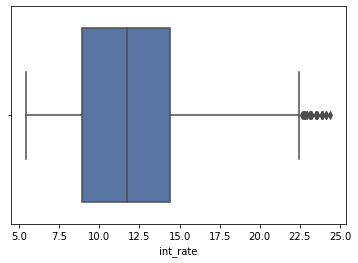

(38577, 19)

In [1757]:
# int_rate column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(data=LoanDf, x="int_rate")
plt.show()
LoanDf.shape

In [1758]:
IQR = LoanDf["int_rate"].quantile(0.75) - LoanDf["int_rate"].quantile(0.25)
max = LoanDf["int_rate"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["int_rate"]<=max]
LoanDf.shape

Max: 22.540000000000003


(38512, 19)

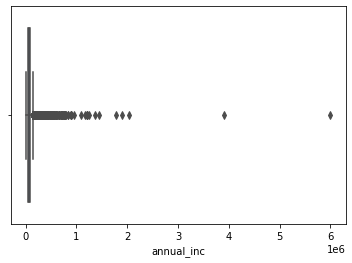

(38512, 19)

In [1759]:
# annual_inc column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(data=LoanDf, x="annual_inc")
plt.show()
LoanDf.shape

In [1760]:
IQR = LoanDf["annual_inc"].quantile(0.75) - LoanDf["annual_inc"].quantile(0.25)
max = LoanDf["annual_inc"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["annual_inc"]<=max]
LoanDf.shape

Max: 145000.0


(36758, 19)

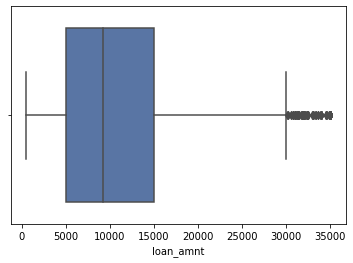

(36758, 19)

In [1761]:
# loan_amnt column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(data=LoanDf, x="loan_amnt")
plt.show()
LoanDf.shape

In [1762]:
IQR = LoanDf["loan_amnt"].quantile(0.75) - LoanDf["loan_amnt"].quantile(0.25)
max = LoanDf["loan_amnt"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["loan_amnt"]<=max]
LoanDf.shape

Max: 30000.0


(36222, 19)

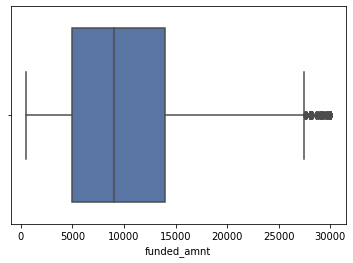

(36222, 19)

In [1763]:
# funded_amnt column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(data=LoanDf, x="funded_amnt")
plt.show()
LoanDf.shape

In [1764]:
IQR = LoanDf["funded_amnt"].quantile(0.75) - LoanDf["funded_amnt"].quantile(0.25)
max = LoanDf["funded_amnt"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["funded_amnt"]<=max]
LoanDf.shape

Max: 27500.0


(35838, 19)

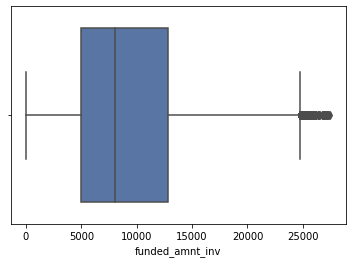

(35838, 19)

In [1765]:
# funded_amnt_inv column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(data=LoanDf, x="funded_amnt_inv")
plt.show()
LoanDf.shape

In [1766]:
IQR = LoanDf["funded_amnt_inv"].quantile(0.75) - LoanDf["funded_amnt_inv"].quantile(0.25)
max = LoanDf["funded_amnt_inv"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["funded_amnt_inv"]<=max]
LoanDf.shape

Max: 24700.0


(35204, 19)

### Derived Metrics

##### Type driven

In [1767]:
# Column "issue_d" is a date column which can be splitted into month and year
LoanDf["issue_d"] = pd.to_datetime(LoanDf["issue_d"],format="%b-%y")
LoanDf["issue_m"] = LoanDf['issue_d'].dt.month_name().str[:3]
LoanDf["issue_y"] = LoanDf['issue_d'].dt.year

LoanDf[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,Dec,2011
1,2011-12-01,Dec,2011
2,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
5,2011-12-01,Dec,2011


### Binning
##### For some of the quantitative variables in order to help us analyse them it's better to bin to make them categorical, this will give us more information. The columns considered for that are:
- annual_inc
- funded_amnt_inv
- loan_amnt
- dti

In [1768]:
# annual_inc
LoanDf["annual_inc"].describe()

count     35204.000000
mean      59910.192311
std       27649.816096
min        4000.000000
25%       39996.000000
50%       55000.000000
75%       75000.000000
max      145000.000000
Name: annual_inc, dtype: float64

In [1769]:
# Creating binns for Annual Income
bins = [3500, 16000, 30000, 50000, 80000, 100000, 145000] # randoms bins are created w.r.t the distribution 
LoanDf['annual_inc_binned'] = pd.cut(LoanDf['annual_inc'], bins)
LoanDf['annual_inc_binned'].value_counts()

(50000, 80000]      12585
(30000, 50000]      10776
(80000, 100000]      4093
(16000, 30000]       3966
(100000, 145000]     3199
(3500, 16000]         585
Name: annual_inc_binned, dtype: int64

In [1770]:
# funded_amnt_inv
LoanDf["funded_amnt_inv"].describe()

count    35204.000000
mean      9094.474611
std       5572.173468
min          0.000000
25%       4900.000000
50%       8000.000000
75%      12283.013910
max      24700.000000
Name: funded_amnt_inv, dtype: float64

In [1771]:
# Creating binns for Funded Amount by Investor
bins = [0, 4000, 8000, 12000, 16000, 20000, 25000] # randoms bins are created w.r.t the distribution 
LoanDf['funded_amnt_inv_binned'] = pd.cut(LoanDf['funded_amnt_inv'], bins)
LoanDf['funded_amnt_inv_binned'].value_counts()

(4000, 8000]      10951
(8000, 12000]      8170
(0, 4000]          7006
(12000, 16000]     4841
(16000, 20000]     2736
(20000, 25000]     1375
Name: funded_amnt_inv_binned, dtype: int64

In [1772]:
# Loan_amnt
LoanDf["loan_amnt"].describe()

count    35204.000000
mean      9860.169299
std       5909.233974
min        500.000000
25%       5000.000000
50%       8900.000000
75%      14000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

In [1773]:
# Creating binns for Loan Amount
bins = [0, 4000, 8000, 12000, 16000, 20000, 30000] # randoms bins are created w.r.t the distribution 
LoanDf['loan_amnt_binned'] = pd.cut(LoanDf['loan_amnt'], bins)
LoanDf['loan_amnt_binned'].value_counts()

(4000, 8000]      10811
(8000, 12000]      8310
(0, 4000]          6038
(12000, 16000]     4970
(16000, 20000]     3081
(20000, 30000]     1994
Name: loan_amnt_binned, dtype: int64

In [1774]:
# Dti
LoanDf["dti"].describe()

count    35204.000000
mean        13.390286
std          6.668843
min          0.000000
25%          8.270000
50%         13.500000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

In [1775]:
# Creating binns for DTI
bins = [0, 5, 10, 15, 20, 25] # randoms bins are created w.r.t the distribution 
LoanDf['dti_binned'] = pd.cut(LoanDf['dti'], bins)
LoanDf['dti_binned'].value_counts()

(10, 15]    8819
(15, 20]    8112
(5, 10]     7023
(20, 25]    6166
(0, 5]      4343
Name: dti_binned, dtype: int64

In [1776]:
# Interest Rate
LoanDf["int_rate"].describe()

count    35204.000000
mean        11.722595
std          3.563821
min          5.420000
25%          8.900000
50%         11.580000
75%         14.170000
max         22.480000
Name: int_rate, dtype: float64

In [1777]:
# Creating binns for Interest Rate
bins = [0, 10, 12.5, 16, 20] # randoms bins are created w.r.t the distribution 
LoanDf['int_rate_binned'] = pd.cut(LoanDf['int_rate'], bins)
LoanDf['int_rate_binned'].value_counts()

(0.0, 10.0]     11725
(12.5, 16.0]    10535
(10.0, 12.5]     8682
(16.0, 20.0]     3817
Name: int_rate_binned, dtype: int64

### Decision on Loan Amount, Funded Amount and Funded Amount by Investor

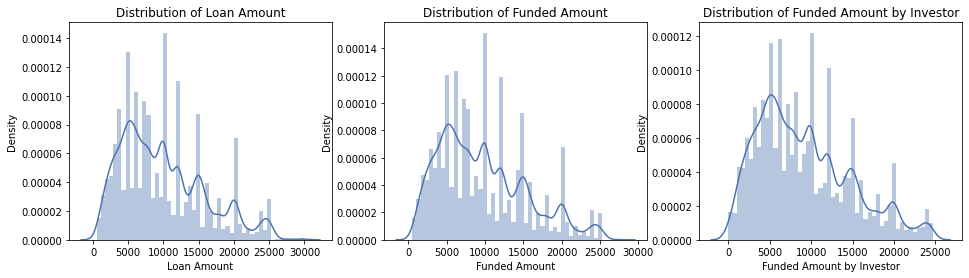

In [1778]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.distplot(LoanDf["loan_amnt"])
plt.xlabel("Loan Amount")
plt.title("Distribution of Loan Amount")

plt.subplot(1,3,2)
sns.distplot(LoanDf["funded_amnt"])
plt.xlabel("Funded Amount")
plt.title("Distribution of Funded Amount")

plt.subplot(1,3,3)
sns.distplot(LoanDf["funded_amnt_inv"])
plt.xlabel("Funded Amount by Investor")
plt.title("Distribution of Funded Amount by Investor")

plt.show()

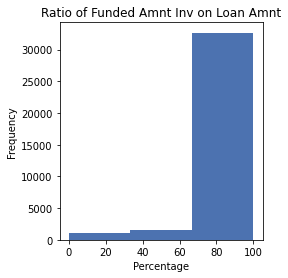

In [1779]:
# Creating plot to understand the ratio of Funded Amount by Investor against Total Amount
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
LoanDf.apply(lambda x: (x["funded_amnt_inv"]/x["loan_amnt"]*100), axis = 1).round(2).plot.hist(bins=3)
plt.xlabel("Percentage")
plt.title("Ratio of Funded Amnt Inv on Loan Amnt")
plt.show()

- Distribution is same for all three varianles i.e Loan Amount, Funded Amount and Funded Amount by Investor
- The ratio of Funded Amount Inv against Loan Amount has considerable number of entries between 0-80%. Which means that not for all requested Loan Amount, Funded amount by investor is 80 - 100%
- The final amount which a borrower gets is the Funded Amount by Investor. Hence we believe all analysis should be on Funded Amnt Inv!

### 4. Sanity Check

In [1780]:
# Funded amount or Funded amount investment should not be greater than Loan amount

LoanDf[(LoanDf["funded_amnt"] > LoanDf["loan_amnt"]) | (LoanDf["funded_amnt_inv"] > LoanDf["loan_amnt"])]

# Observation
# There are no such records

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,addr_state,dti,pub_rec_bankruptcies,issue_m,issue_y,annual_inc_binned,funded_amnt_inv_binned,loan_amnt_binned,dti_binned,int_rate_binned


In [1781]:
# Interest rate should not have any negative, zero or extremely high values

LoanDf["int_rate"].describe()

# Observation
# The min interest rate is 5.42% and max interest rate is 24.59 which looks legitimate

count    35204.000000
mean        11.722595
std          3.563821
min          5.420000
25%          8.900000
50%         11.580000
75%         14.170000
max         22.480000
Name: int_rate, dtype: float64

In [1782]:
# Installment should not be greater than loan amount

LoanDf[LoanDf["installment"] > LoanDf["loan_amnt"]]

# Observation
# There are no such records

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,addr_state,dti,pub_rec_bankruptcies,issue_m,issue_y,annual_inc_binned,funded_amnt_inv_binned,loan_amnt_binned,dti_binned,int_rate_binned


##### DataFrame structure

In [1783]:
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35204 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      35204 non-null  int64         
 1   loan_amnt               35204 non-null  int64         
 2   funded_amnt             35204 non-null  int64         
 3   funded_amnt_inv         35204 non-null  float64       
 4   term                    35204 non-null  int32         
 5   int_rate                35204 non-null  float64       
 6   installment             35204 non-null  float64       
 7   grade                   35204 non-null  object        
 8   sub_grade               35204 non-null  object        
 9   emp_length              35204 non-null  int32         
 10  home_ownership          35204 non-null  object        
 11  annual_inc              35204 non-null  float64       
 12  verification_status     35204 non-null  object

##### Listing different types of columns

In [1784]:
# Categorical varibles with type object and category
print("Categorical variables\n")
for i,j in enumerate(LoanDf.select_dtypes(include=['object','category']).columns):
    print(i+1,"-",j)

Categorical variables

1 - grade
2 - sub_grade
3 - home_ownership
4 - verification_status
5 - loan_status
6 - purpose
7 - addr_state
8 - issue_m
9 - annual_inc_binned
10 - funded_amnt_inv_binned
11 - loan_amnt_binned
12 - dti_binned
13 - int_rate_binned


In [1785]:
# Quantitative variable with type int and float
print("Quantitative variables\n")
for i,j in enumerate(LoanDf.select_dtypes(include=['int64','float64']).columns):
    print(i+1,"-",j)

Quantitative variables

1 - id
2 - loan_amnt
3 - funded_amnt
4 - funded_amnt_inv
5 - int_rate
6 - installment
7 - annual_inc
8 - dti
9 - pub_rec_bankruptcies
10 - issue_y


In [1786]:
# Datetime variable
print("DateTime variables\n")
for i,j in enumerate(LoanDf.select_dtypes(include=['datetime64']).columns):
    print(i+1,"-",j)

DateTime variables

1 - issue_d


### 5. Univariate Analysis

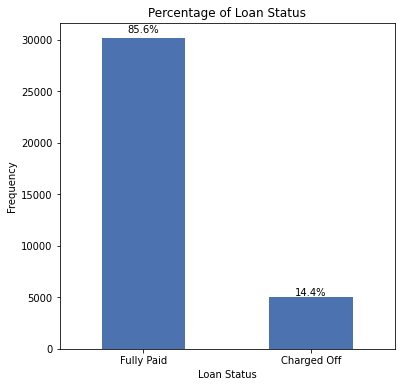

In [1787]:
# Determine the percentage of loans that have been charged off

ax = LoanDf["loan_status"].value_counts().plot.bar(figsize=[6,6])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height/len(LoanDf["loan_status"])*100, 2)}%', xy=(x + width/2, y + height*1.02), ha='center')

plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Percentage of Loan Status")
plt.show()

# Observation
# 14.4% of loans have been charged off

In [1788]:
# Create a data segment containing only Charged-off loans
chargedOffLoanDF = LoanDf[LoanDf["loan_status"]=="Charged Off"]
chargedOffLoanDF.shape

(5069, 26)

In [1789]:
# Create a data segment containing only Paid loans
PaidLoanDF = LoanDf[LoanDf["loan_status"]=="Fully Paid"]
PaidLoanDF.shape

(30135, 26)

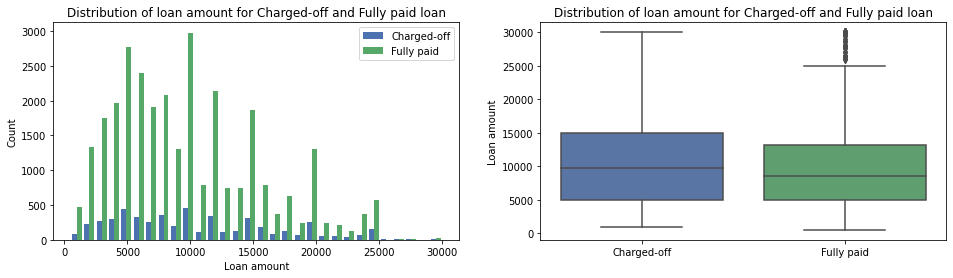

In [1790]:
# Distribution of Loan Amount among Charged-off and fully paid category

plt.figure(figsize=[16,4])
plt.style.use('seaborn-deep')

plt.subplot(1,2,1)
plt.hist([chargedOffLoanDF["loan_amnt"], PaidLoanDF["loan_amnt"]], bins=30, label=["Charged-off", "Fully paid"])
plt.legend(loc='upper right')
plt.title("Distribution of loan amount for Charged-off and Fully paid loan")
plt.xlabel("Loan amount")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot([chargedOffLoanDF["loan_amnt"], PaidLoanDF["loan_amnt"]])
plt.xticks([0, 1], ["Charged-off", "Fully paid"])
plt.ylabel("Loan amount")
plt.title("Distribution of loan amount for Charged-off and Fully paid loan")

plt.show()

# Observation
# The IQR for charged-off loans is slightly higher than fully paid loans
# There are spikes for loan amount like 5000, 10000, 12000, 15000 etc as people generally take loan of rounded amount

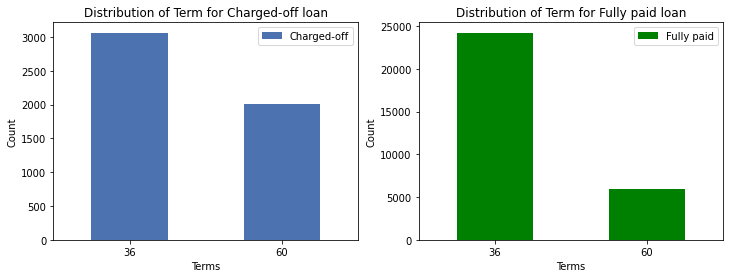

In [1791]:
# Distribution of term among Charged-off and fully paid category

plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
chargedOffLoanDF["term"].value_counts().plot.bar(label="Charged-off")
plt.legend()
plt.xlabel("Terms")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.title("Distribution of Term for Charged-off loan")

plt.subplot(1,2,2)
PaidLoanDF["term"].value_counts().plot.bar(label="Fully paid", color="Green")
plt.legend()
plt.xlabel("Terms")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.title("Distribution of Term for Fully paid loan")

plt.show()

# Observation
# Majority of the borrowers prefer term of 36 months in both Fully paid and Charged-off loans.

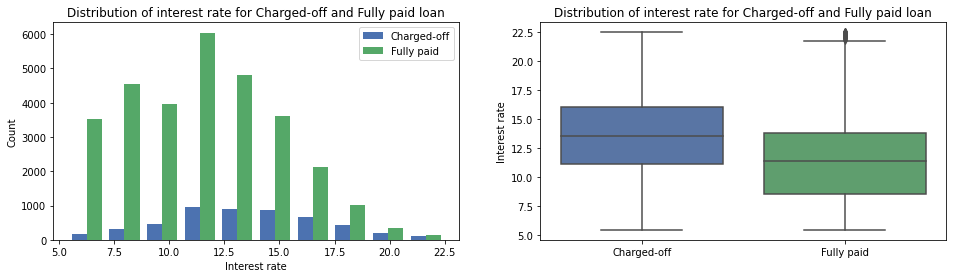

In [1792]:
# Distribution of Interest Rate among Charged-off and fully paid category

plt.figure(figsize=[16,4])
plt.style.use('seaborn-deep')

plt.subplot(1,2,1)
plt.hist([chargedOffLoanDF["int_rate"],PaidLoanDF["int_rate"]], label=["Charged-off", "Fully paid"])
plt.legend(loc='upper right')
plt.title("Distribution of interest rate for Charged-off and Fully paid loan")
plt.xlabel("Interest rate")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot([chargedOffLoanDF["int_rate"],PaidLoanDF["int_rate"]],)
plt.xticks([0, 1], ["Charged-off", "Fully paid"])
plt.ylabel("Interest rate")
plt.title("Distribution of interest rate for Charged-off and Fully paid loan")
plt.show()

# Observation
# Interest rate is higher for Charged-off compared to Fully paid loans.
# Higher the interest rate, Loan becomes more risky

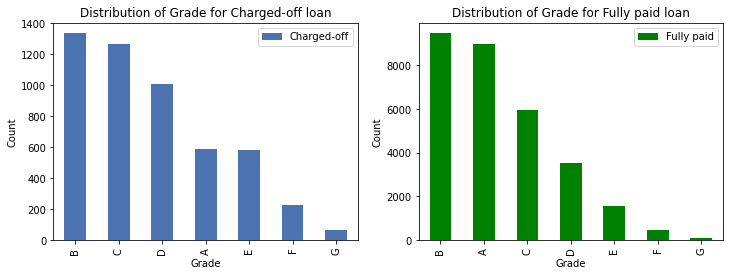

In [1793]:
# Distribution of Grade among Charged-off and fully paid category

plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
chargedOffLoanDF["grade"].value_counts().plot.bar(label="Charged-off")
plt.legend()
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Distribution of Grade for Charged-off loan")

plt.subplot(1,2,2)
PaidLoanDF["grade"].value_counts().plot.bar(label="Fully paid", color="Green")
plt.legend()
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Distribution of Grade for Fully paid loan")

plt.show()

# Observation
# Customers with grade B, C and D are likely to default
# Most of the borower are from grade B, C and D. Hence the number of defaulters are also more from this category.

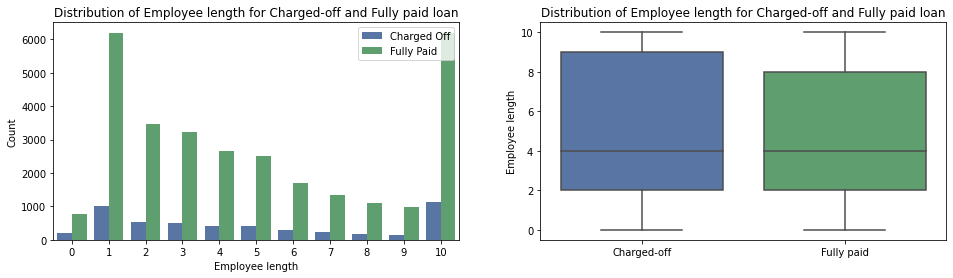

In [1794]:
# Distribution of emp_length among Charged-off and fully paid category

plt.figure(figsize=[16,4])
plt.style.use('seaborn-deep')

plt.subplot(1,2,1)
sns.countplot(data=LoanDf, x="emp_length", hue="loan_status", hue_order=["Charged Off", "Fully Paid"])
plt.legend(loc='upper right')
plt.title("Distribution of Employee length for Charged-off and Fully paid loan")
plt.xlabel("Employee length")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot([chargedOffLoanDF["emp_length"],PaidLoanDF["emp_length"]],)
plt.xticks([0, 1], ["Charged-off", "Fully paid"])
plt.ylabel("Employee length")
plt.title("Distribution of Employee length for Charged-off and Fully paid loan")

plt.show()

# Observation
# Employee Length is slightly high for Charged-off when compared to Fully Paid

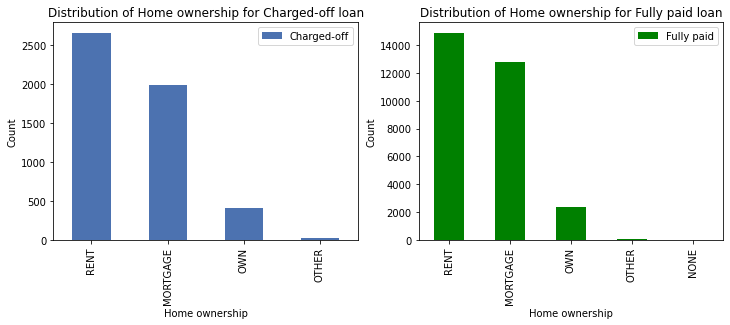

In [1795]:
# Distribution of Home-ownership among Charged-off and fully paid category

plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
chargedOffLoanDF["home_ownership"].value_counts().plot.bar(label="Charged-off")
plt.legend()
plt.xlabel("Home ownership")
plt.ylabel("Count")
plt.title("Distribution of Home ownership for Charged-off loan")

plt.subplot(1,2,2)
PaidLoanDF["home_ownership"].value_counts().plot.bar(label="Fully paid", color="Green")
plt.legend()
plt.xlabel("Home ownership")
plt.ylabel("Count")
plt.title("Distribution of Home ownership for Fully paid loan")

plt.show()

# Observation
# Most of the borrowers are from category Rent and Mortage. Hence number of defaulters are also high in these categories.

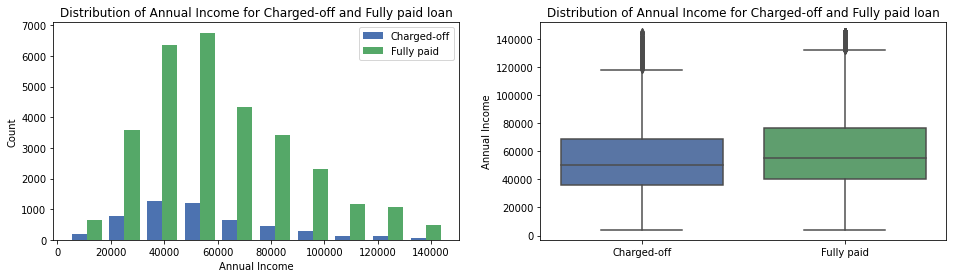

Range of annual income of charged-off people is between -13500.0 - 118500.0


In [1796]:
# Distribution of Annual income among Charged-off and fully paid category

plt.figure(figsize=[16,4])
plt.style.use('seaborn-deep')

plt.subplot(1,2,1)
plt.hist([chargedOffLoanDF["annual_inc"],PaidLoanDF["annual_inc"]], label=["Charged-off", "Fully paid"])
plt.legend(loc='upper right')
plt.title("Distribution of Annual Income for Charged-off and Fully paid loan")
plt.xlabel("Annual Income")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot([chargedOffLoanDF["annual_inc"],PaidLoanDF["annual_inc"]],)
plt.xticks([0, 1], ["Charged-off", "Fully paid"])
plt.ylabel("Annual Income")
plt.title("Distribution of Annual Income for Charged-off and Fully paid loan")

plt.show()

IQR = chargedOffLoanDF["annual_inc"].quantile(0.75) - chargedOffLoanDF["annual_inc"].quantile(0.25)
max = chargedOffLoanDF["annual_inc"].quantile(0.75) + 1.5 * IQR
min = chargedOffLoanDF["annual_inc"].quantile(0.25) - 1.5 * IQR

print("Range of annual income of charged-off people is between {} - {}".format(min, max))

# Observation 
# Annual income for Charged-off is slightly lesser compared to fully paid loans

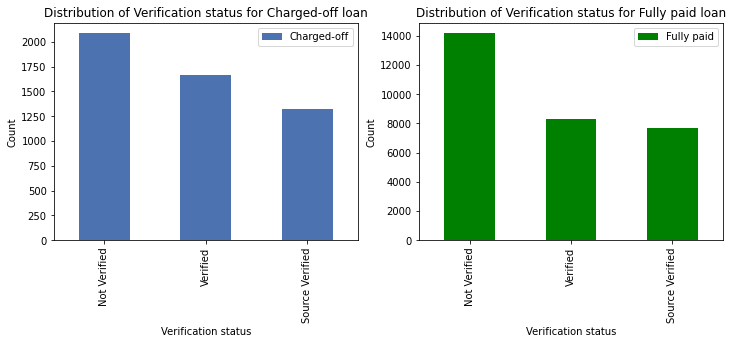

In [1797]:
# Distribution of Verification status among Charged-off and fully paid category

plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
chargedOffLoanDF["verification_status"].value_counts().plot.bar(label="Charged-off")
plt.legend()
plt.xlabel("Verification status")
plt.ylabel("Count")
plt.title("Distribution of Verification status for Charged-off loan")

plt.subplot(1,2,2)
PaidLoanDF["verification_status"].value_counts().plot.bar(label="Fully paid", color="Green")
plt.legend()
plt.xlabel("Verification status")
plt.ylabel("Count")
plt.title("Distribution of Verification status for Fully paid loan")

plt.show()

# Observation
# More number of borowers are from Not Verified catogery. Hence the number of defaulters is also high in this category.

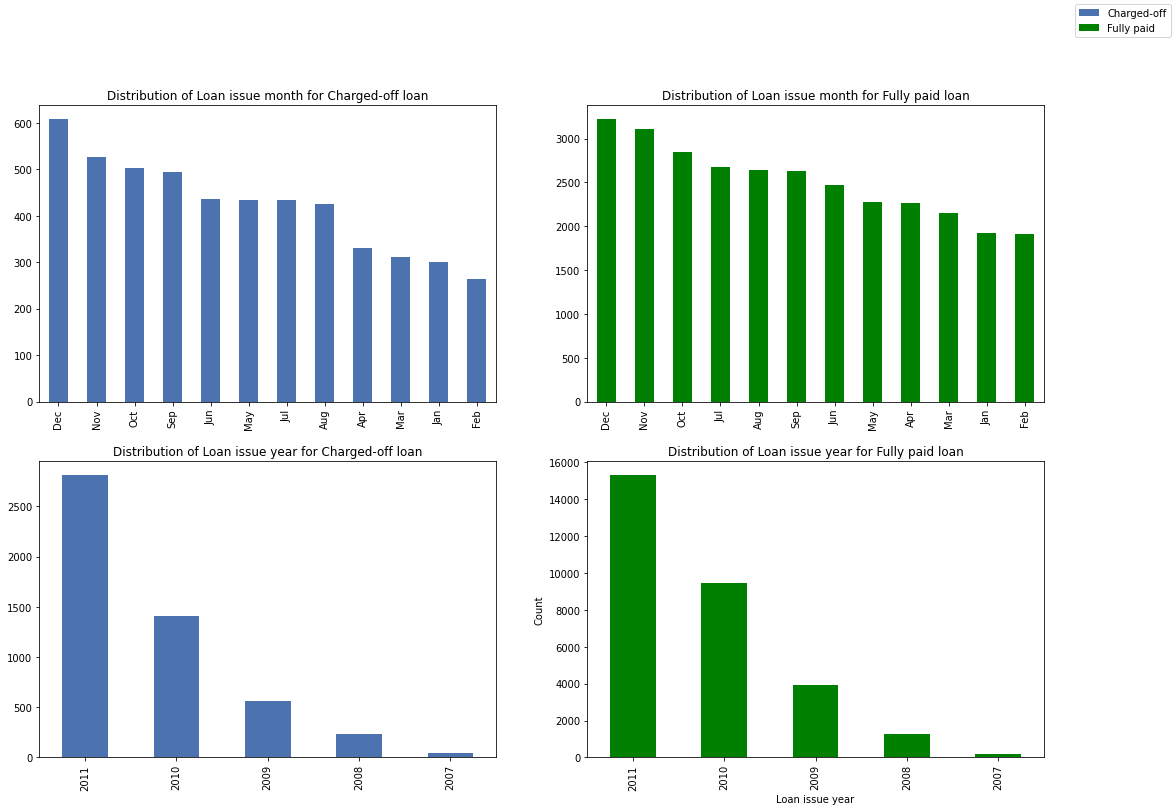

In [1798]:
# Distribution of Loan issue month among Charged-off and fully paid category

fig, ax = plt.subplots(2,2,figsize=(18,12))

chargedOffLoanDF["issue_m"].value_counts().plot.bar(ax = ax[0][0], title="Distribution of Loan issue month for Charged-off loan")
plt.xlabel("Loan issue month")
plt.ylabel("Count")

PaidLoanDF["issue_m"].value_counts().plot.bar(ax = ax[0][1], color="Green", title="Distribution of Loan issue month for Fully paid loan")
plt.xlabel("Loan issue month")
plt.ylabel("Count")

chargedOffLoanDF["issue_y"].value_counts().plot.bar(ax = ax[1][0], title="Distribution of Loan issue year for Charged-off loan")
plt.xlabel("Loan issue year")
plt.ylabel("Count")

PaidLoanDF["issue_y"].value_counts().plot.bar(ax = ax[1][1], color="Green", title="Distribution of Loan issue year for Fully paid loan")
plt.xlabel("Loan issue year")
plt.ylabel("Count")

fig.legend(["Charged-off", "Fully paid"])
plt.show()

# Observation
# In general 2011 and Dec is the year and month having more default, also the total no of loan is in general more during this year and month​
# Sept and June seems to be at the higher side in charged off chart and lower side at the fully paid chart which is contrary to  other months where the order the almost same b/w charged off and fully paid​
# This could mean that loans applied on Sept and June have higher chance of being defaulted than other months​

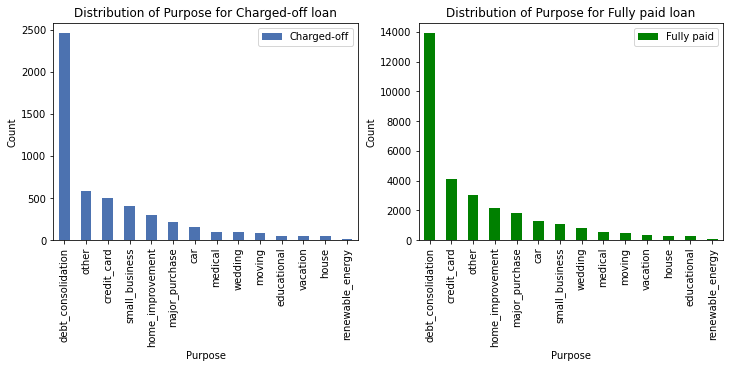

In [1799]:
# Distribution of Purpose among Charged-off and fully paid category

plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
chargedOffLoanDF["purpose"].value_counts().plot.bar(label="Charged-off")
plt.legend()
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.title("Distribution of Purpose for Charged-off loan")

plt.subplot(1,2,2)
PaidLoanDF["purpose"].value_counts().plot.bar(label="Fully paid", color="Green")
plt.legend()
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.title("Distribution of Purpose for Fully paid loan")

plt.show()

# Observation
# Number of loans in 'Debt-consolidation' category is very high. Hence the number of defaulters is also high in this category.

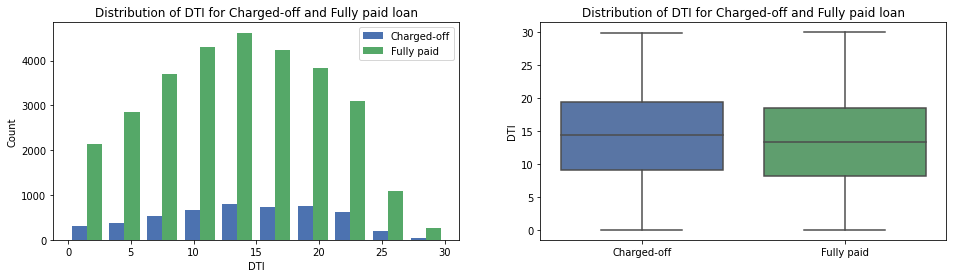

In [1800]:
# Distribution of dti among Charged-off and fully paid category

plt.figure(figsize=[16,4])
plt.style.use('seaborn-deep')

plt.subplot(1,2,1)
plt.hist([chargedOffLoanDF["dti"],PaidLoanDF["dti"]], label=["Charged-off", "Fully paid"])
plt.legend(loc='upper right')
plt.title("Distribution of DTI for Charged-off and Fully paid loan")
plt.xlabel("DTI")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot([chargedOffLoanDF["dti"],PaidLoanDF["dti"]],)
plt.xticks([0, 1], ["Charged-off", "Fully paid"])
plt.ylabel("DTI")
plt.title("Distribution of DTI for Charged-off and Fully paid loan")

plt.show()

# Observation
# DTI is slighter higher for Charged-off catergory when compared to Fully paid.

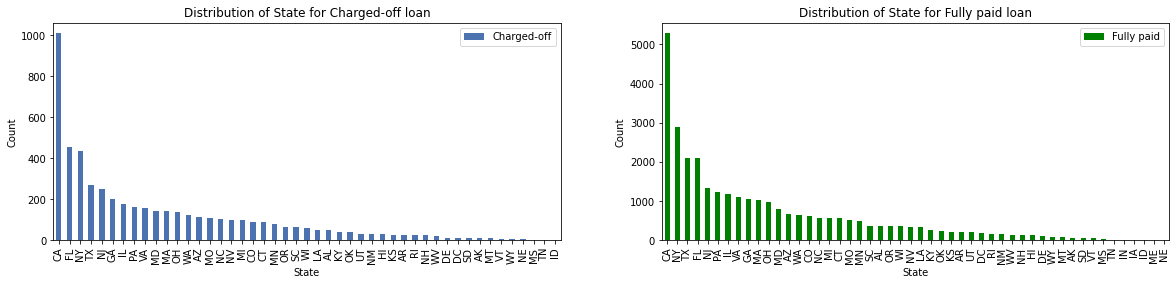

In [1801]:
# Distribution of State among Charged-off and fully paid category

plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
chargedOffLoanDF["addr_state"].value_counts().plot.bar(label="Charged-off")
plt.legend()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of State for Charged-off loan")

plt.subplot(1,2,2)
PaidLoanDF["addr_state"].value_counts().plot.bar(label="Fully paid", color="Green")
plt.legend()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of State for Fully paid loan")

plt.show()

# Observation
# Number of borower in CA is high. Hence the number of defaulters are also high in this category.

##### Now lets see how the distribution of certain categorical variable is in the overall/fully paid dataset compared to charged-off

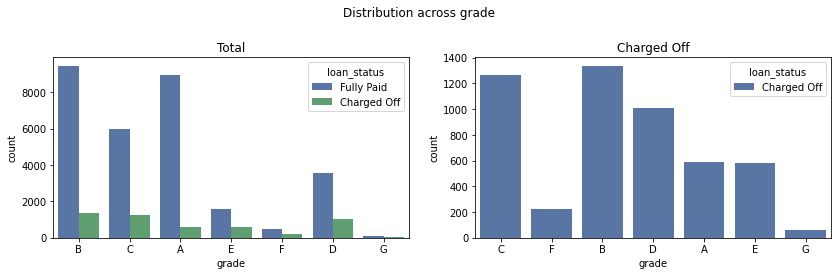

In [1802]:
# Distribution across grade
fig, axs = plt.subplots(1,2,figsize=(12,4))
fig.suptitle("Distribution across grade")
sns.countplot(data=LoanDf, x="grade", hue="loan_status", ax = axs[0])
sns.countplot(data=chargedOffLoanDF, x="grade", hue="loan_status", ax = axs[1])
fig.tight_layout(pad=2.0)
axs[0].title.set_text("Total")
axs[1].title.set_text("Charged Off")

fig.show()

# Grade B borrowers tends to default more but D,E,F,G have more ratio of defaulters

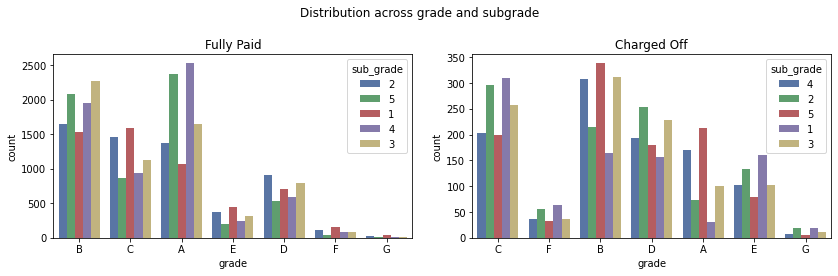

In [1803]:
# Distribution across grade and subgrade
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Distribution across grade and subgrade")
sns.countplot(data=PaidLoanDF, x="grade", hue="sub_grade", ax = axs[0])
sns.countplot(data=chargedOffLoanDF, x="grade",hue="sub_grade", ax = axs[1])
fig.tight_layout(pad=2.0)
axs[0].title.set_text("Fully Paid")
axs[1].title.set_text("Charged Off")

fig.show()

# More number of defaulters are from B5 but groups D2,E1,F1,F2,G1,G2 have more ratio of defaulters

### 6. Bivariate Analysis 

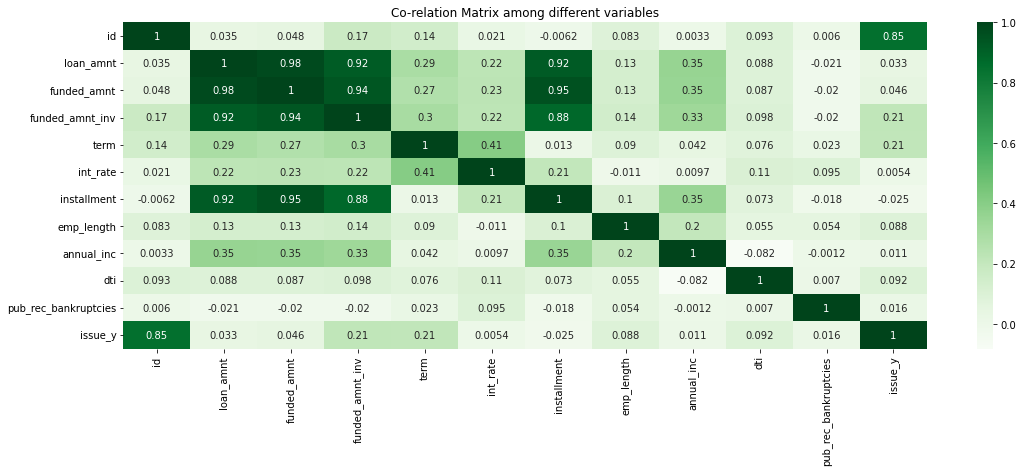

In [1804]:
# Co-relatio Matrix

loanCorrelationDf = LoanDf.corr()
plt.figure(figsize=[18,6])
sns.heatmap(data=loanCorrelationDf, cmap='Greens', annot=True)
plt. title("Co-relation Matrix among different variables")
plt.show()

# Observation
# We see positive co-relation of Funded_amnt_inv with Term, Interest Rate, Installments and Annual Income
# We see negative co-relation of Funded_amnt_inv with pub_rec_bankruptcies

# We also see positive co-relation between (term & interest rate), (Annual Inc & Installment, emp_length)
# We aslo see negative co-relation between (emp_length & interest rate), (Annual Income & dti, pub_rec_bankruptcies)

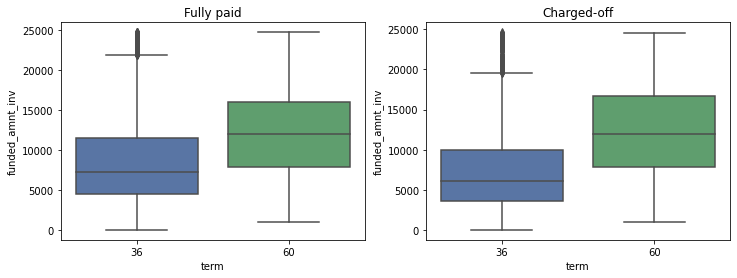

In [1805]:
# Comparison of Funded Amount by Investor against Term
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="term", y="funded_amnt_inv")
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="term", y="funded_amnt_inv")
plt.title("Charged-off")

plt.show()

# Observation
# Both in fully paid and charged off borowwers prefer taking less funded_amount_inv for less term

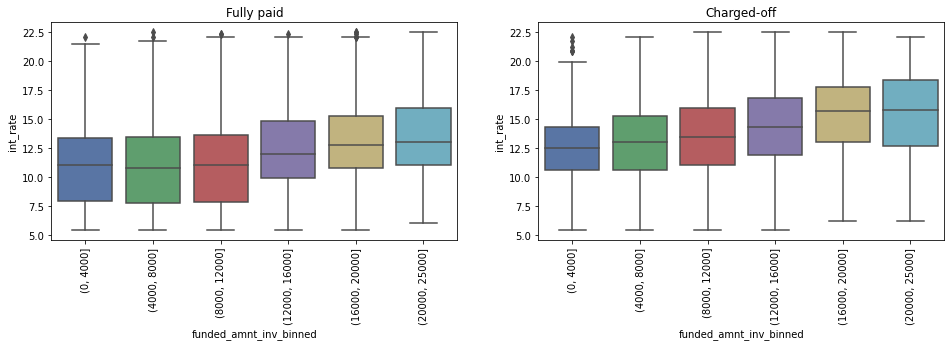

In [1806]:
# Comparison of Funded Amount by Investor against Interest Rate
plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="funded_amnt_inv_binned", y="int_rate")
plt.xticks(rotation=90)
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="funded_amnt_inv_binned", y="int_rate")
plt.xticks(rotation=90)
plt.title("Charged-off")

plt.show()

# Observation
# The interest rate increases as the funded_amnt_inv increases
# However for Charged-off category the interest rate is higher than the fully paid

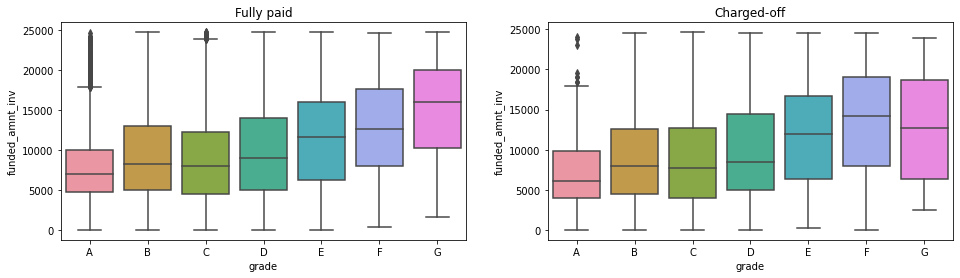

In [1807]:
# Comparison of Funded Amount by Investor against Grade
plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="grade", y="funded_amnt_inv", order=['A','B','C','D','E','F','G'])
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="grade", y="funded_amnt_inv", order=['A','B','C','D','E','F','G'])
plt.title("Charged-off")

plt.show()

# Observation
# In Grade 'F', the number of Charged-off are higher for high Funded_amnt_inv compared to Fully paid
# In Grade 'G', the number of Charged-off are higher for less Funded_amnt_inv compared to Fully paid

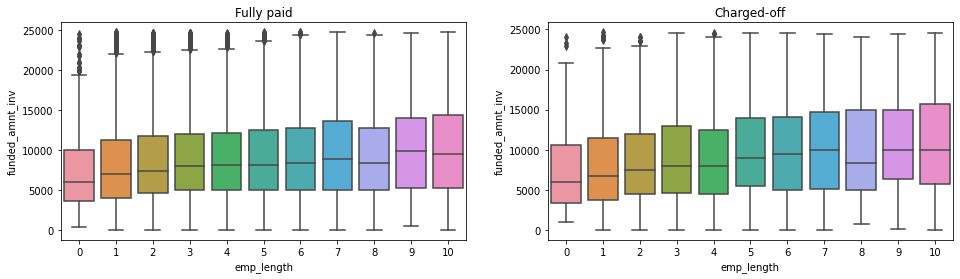

In [1808]:
# Comparison of Funded Amount by Investor against Employee Length
plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="emp_length", y="funded_amnt_inv")
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="emp_length", y="funded_amnt_inv")
plt.title("Charged-off")

plt.show()

# Observation
# In Employee Length of 8 Years, the charged-off are more for high funded_amnt_inv compared to fully paid
# In Employee Length of 9 Years, the Fully paid are more for less funded_amnt_inv compared to charged-off

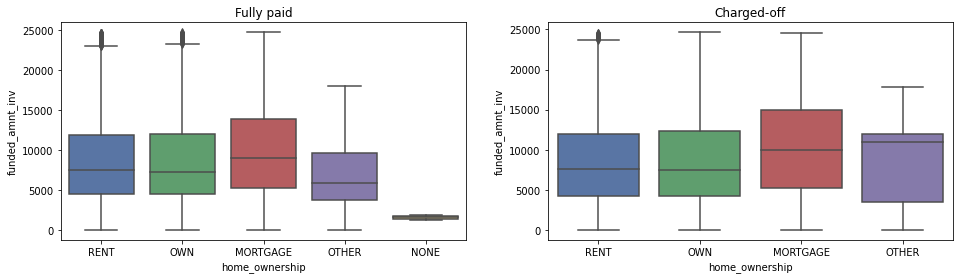

In [1809]:
# Comparison of Funded Amount by Investor against Home Ownership
plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="home_ownership", y="funded_amnt_inv")
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="home_ownership", y="funded_amnt_inv")
plt.title("Charged-off")

plt.show()

# Observation
# In Others category, borrower with less funded_amt_inv tends to default

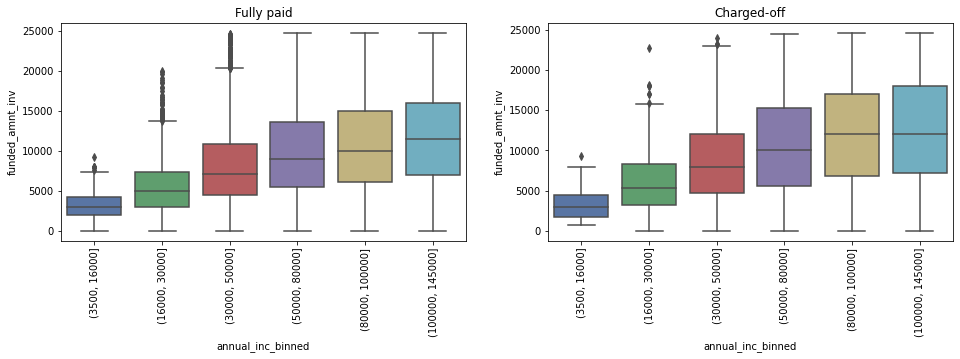

In [1810]:
# Comparison of Funded Amount by Investor against Annual Income
plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="annual_inc_binned", y="funded_amnt_inv")
plt.xticks(rotation=90)
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="annual_inc_binned", y="funded_amnt_inv")
plt.xticks(rotation=90)
plt.title("Charged-off")

plt.show()

# Observation
# As the annual income increases, the funded_amnt_inv also increases and so does the risk to default

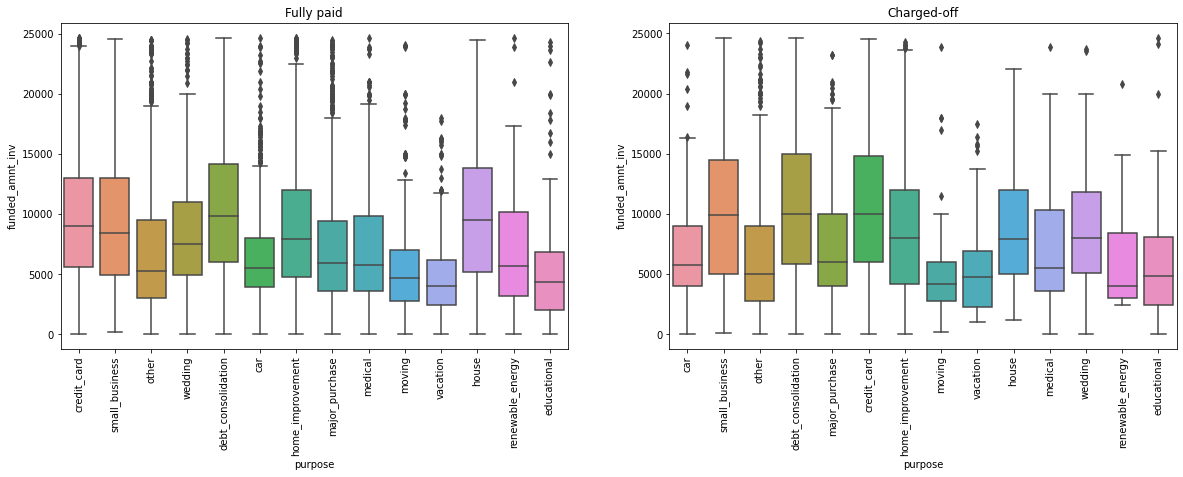

In [1811]:
# Comparison of Funded Amount by Investor against Purpose
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="purpose", y="funded_amnt_inv")
plt.xticks(rotation=90)
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="purpose", y="funded_amnt_inv")
plt.xticks(rotation=90)
plt.title("Charged-off")

plt.show()

# Observation
# We observe that average funded_amnt_inv is higher for small business, Vacation and Education

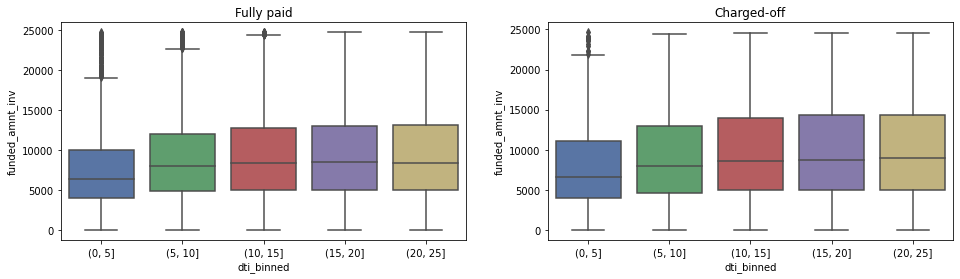

In [1812]:
plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="dti_binned", y="funded_amnt_inv")
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="dti_binned", y="funded_amnt_inv")
plt.title("Charged-off")

plt.show()

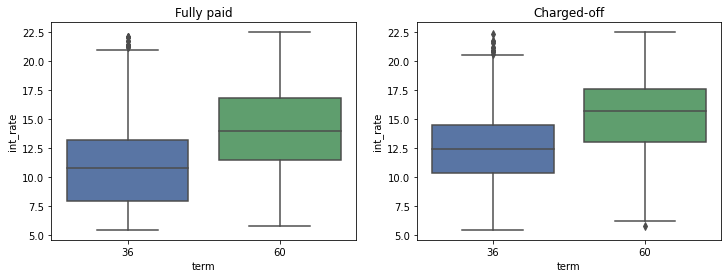

In [1813]:
# Comparison of Term and Interest Rate
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
sns.boxplot(data=PaidLoanDF, x="term", y="int_rate")
plt.title("Fully paid")

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="term", y="int_rate")
plt.title("Charged-off")

plt.show()

# Observation
# As the term increases the interest rate also increases in both Fully paid and Charged-off
# There by showing positive co-relation

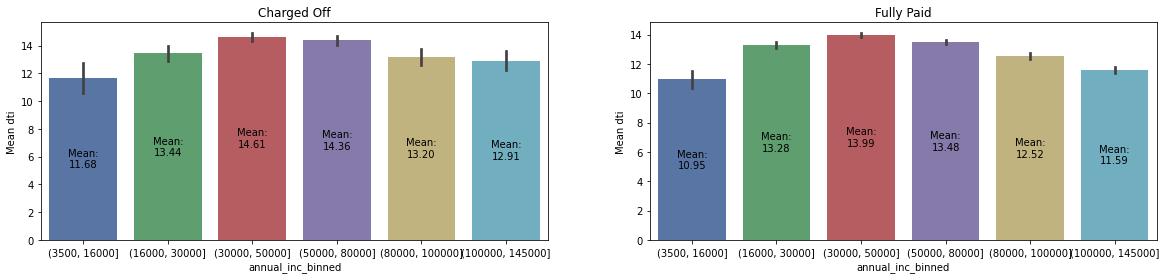

In [1814]:
# Comparison of Annual Income and DTI
fig,ax = plt.subplots(1,2,figsize=(20,4))
s = sns.barplot(data=chargedOffLoanDF, x="annual_inc_binned", y="dti", ax=ax[0])
s.set_title("Charged Off")

ax[0].bar_label(ax[0].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[0].set(ylabel='Mean dti')

s = sns.barplot(data=PaidLoanDF, x="annual_inc_binned", y="dti", ax=ax[1])

ax[1].bar_label(ax[1].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[1].set(ylabel='Mean dti')

s.set_title("Fully Paid")
plt.show()

#Observation

# In general when we compare b/w fully paid and charged off the dti is more by 1-2(%) in each income category.
# With this we could provide an upper limit for dti in each income category more than that would be considered
# risky

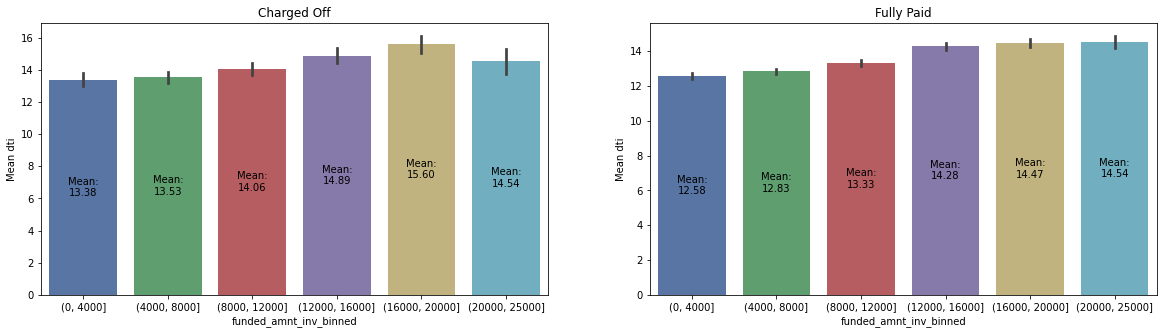

In [1815]:
# Funded amount by investor and dti
fig,ax = plt.subplots(1,2,figsize=(20,5))
s = sns.barplot(data=chargedOffLoanDF, x="funded_amnt_inv_binned", y="dti", ax=ax[0])
s.set_title("Charged Off")

ax[0].bar_label(ax[0].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[0].set(ylabel='Mean dti')

s = sns.barplot(data=PaidLoanDF, x="funded_amnt_inv_binned", y="dti", ax=ax[1])

ax[1].bar_label(ax[1].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[1].set(ylabel='Mean dti')

s.set_title("Fully Paid")
plt.show()

# Observation

# In general when we compare b/w fully paid and charged off the dti is more by 1-2(%) 
# in each funded amount invested category.
# With this we could provide an upper limit for dti in each fund amt category more than that would be considered
# risky

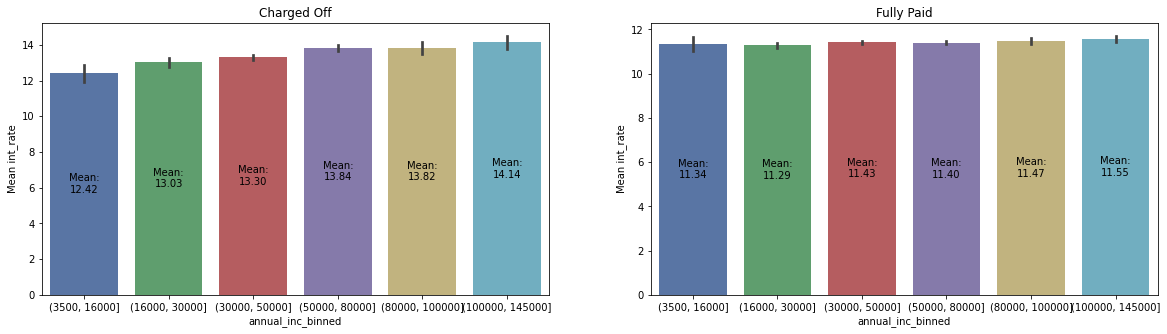

In [1816]:
#Annual income and int rate
fig,ax = plt.subplots(1,2,figsize=(20,5))
s = sns.barplot(data=chargedOffLoanDF, x="annual_inc_binned", y="int_rate", ax=ax[0])
s.set_title("Charged Off")

ax[0].bar_label(ax[0].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[0].set(ylabel='Mean int_rate')

s = sns.barplot(data=PaidLoanDF, x="annual_inc_binned", y="int_rate", ax=ax[1])

ax[1].bar_label(ax[1].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[1].set(ylabel='Mean int_rate')

s.set_title("Fully Paid")
plt.show()

# Observation

# In general when we compare b/w fully paid and charged off the interest rate is more by 1-2(%) 
# in each income category.
# With this we could provide an upper limit for interest rate in each income category more than that would be considered
# risky

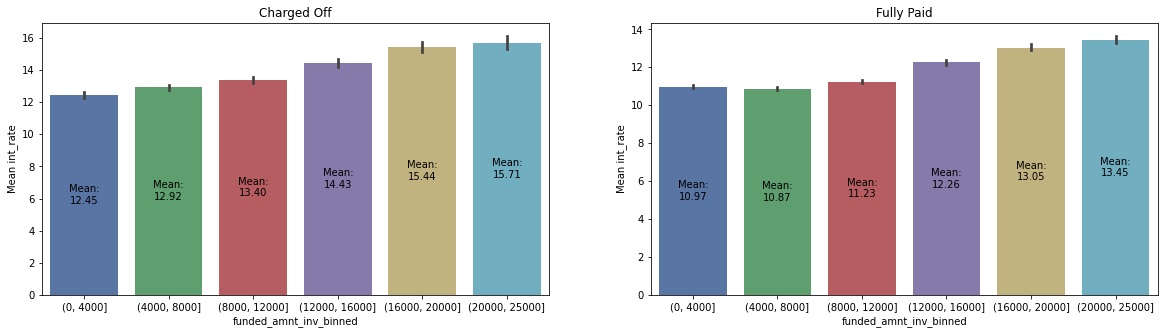

In [1817]:
#Funded amount by investor and int rate

fig,ax = plt.subplots(1,2,figsize=(20,5))
s = sns.barplot(data=chargedOffLoanDF, x="funded_amnt_inv_binned", y="int_rate", ax=ax[0])
s.set_title("Charged Off")

ax[0].bar_label(ax[0].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[0].set(ylabel='Mean int_rate')

s = sns.barplot(data=PaidLoanDF, x="funded_amnt_inv_binned", y="int_rate", ax=ax[1])

ax[1].bar_label(ax[1].containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax[1].set(ylabel='Mean int_rate')

s.set_title("Fully Paid")
plt.show()

# Observation

# In general when we compare b/w fully paid and charged off the interest rate is more by 1-2(%) 
# in each funded amount invested category.
# With this we could provide an upper limit for interest rate in each funded amount category, more than that would be considered
# risky

### 7. Multivariate Analysis

##### Behaviour of Funded Amount by Investor with various other variables

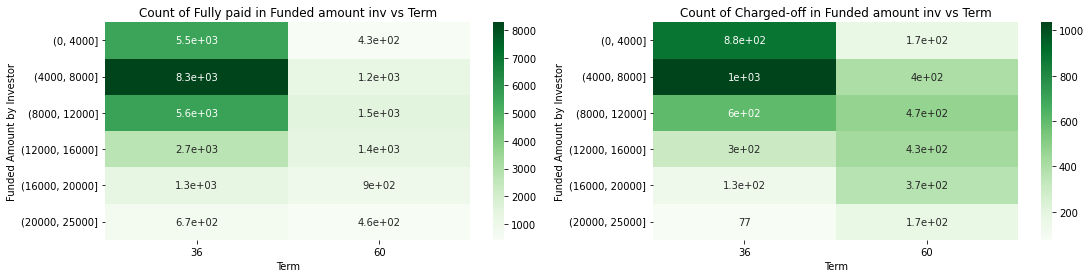

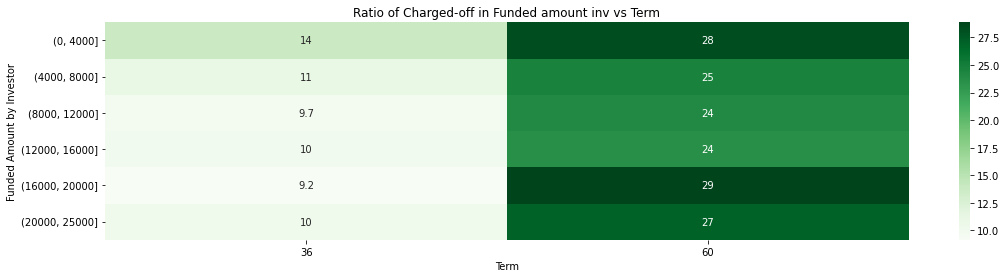

In [1818]:
# Comparison of Funded Amount by Investor and Term
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="term", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Term")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="term", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Term")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Term")

plt.show()

# Observation
# Borrowers with higher term tends to default more especially with Funded_amnt_inv in range of 0-4K and 16K-20K and Term as 60 months 


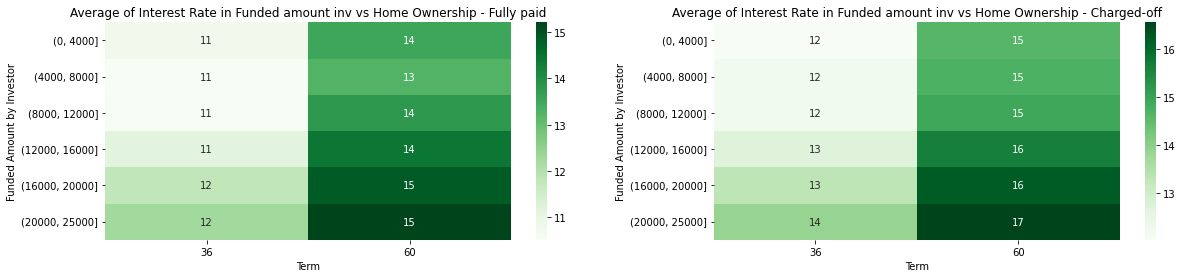

In [1819]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="term", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="term", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

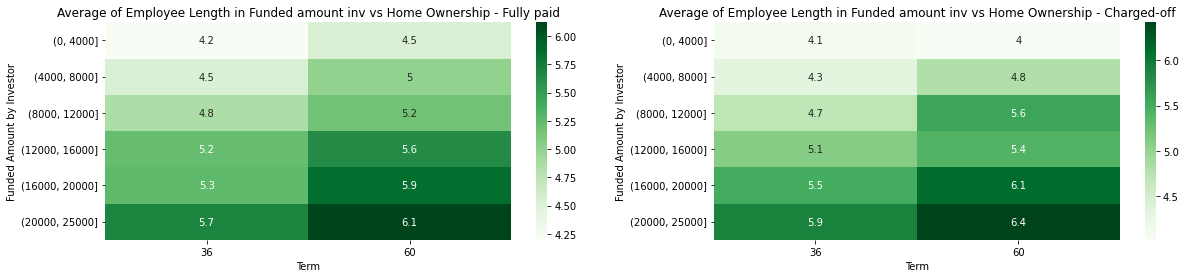

In [1820]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="term", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="term", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Term")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

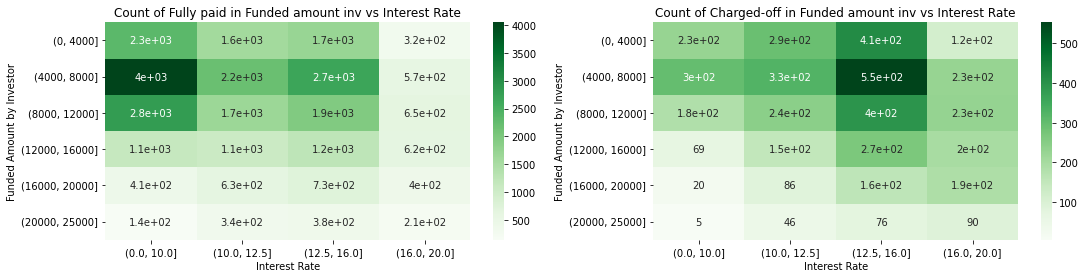

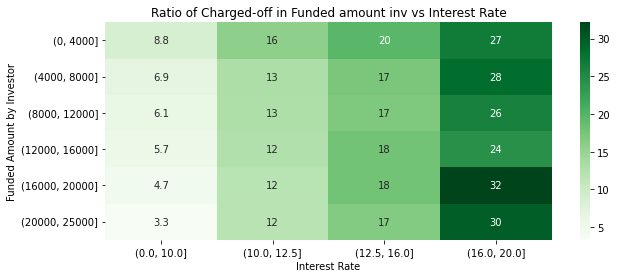

In [1826]:
# Comparison of Funded Amount by Investor and Interest Rate
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="int_rate_binned", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Interest Rate")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Interest Rate")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="int_rate_binned", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Interest Rate")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Interest Rate")

plt.show()

plt.figure(figsize=[10,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Interest Rate")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Interest Rate")

plt.show()

# Observation
# Borrowers with higher interest rate tends to default more especially with Funded_amnt_inv in 16K to 25K and Interest rate as 16-20%

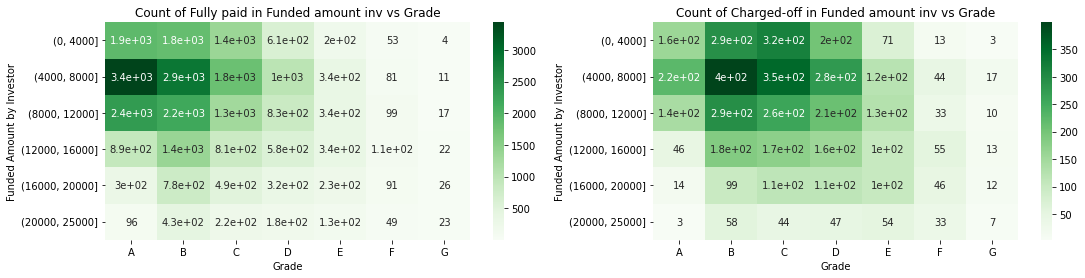

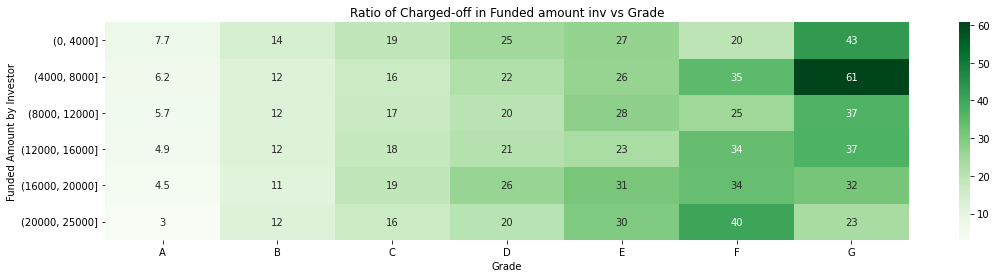

In [1642]:
# Comparison of Funded Amount by Investor and Grade
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="grade", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Grade")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Grade")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="grade", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Grade")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Grade")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Grade")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Grade")

plt.show()

# Observation
# Borrowers with higher grade (A-min and G-max) tends to default more
# 61% of borrowers in Grade G with Funded_amnt_inv in (4000,8000] have defaulted

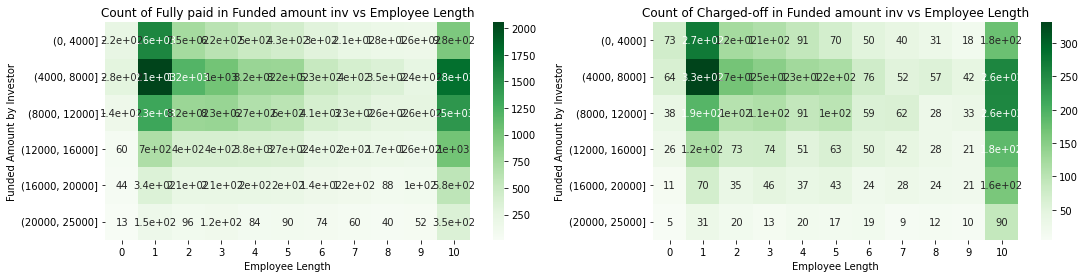

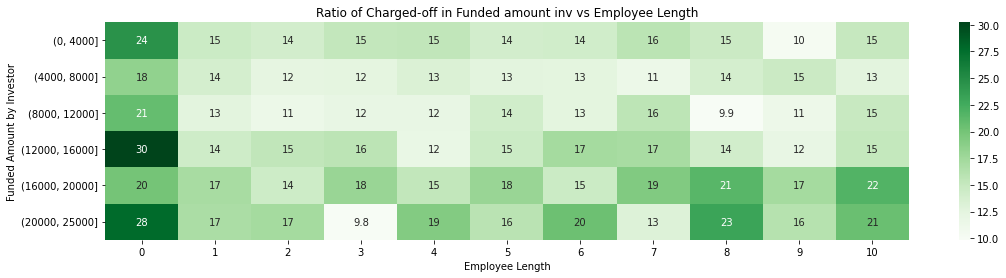

In [1420]:
# Comparison of Funded Amount by Investor and Employee Length
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="emp_length", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Employee Length")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Employee Length")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="emp_length", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Employee Length")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Employee Length")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Employee Length")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Employee Length")

plt.show()

# Observation
# Borrower with Employee Length of 0 years tend to default more for all Funded_amnt_inv range
# Borrower with Employee Length of 6,8,and 10 years tend to default with Funded_amnt_inv in 16K - 25K range

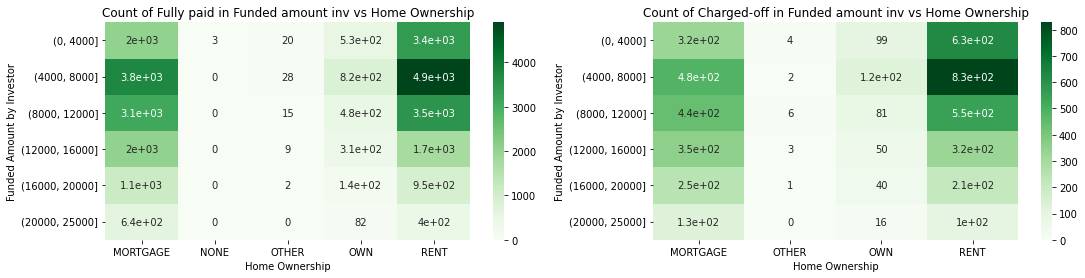

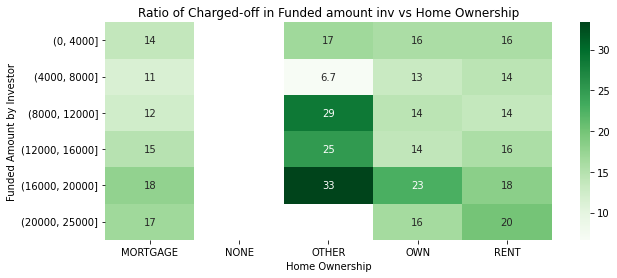

In [1822]:
# Comparison of Funded Amount by Investor and Home Ownership
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Home Ownership")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Home Ownership")

plt.show()

plt.figure(figsize=[10,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Home Ownership")

plt.show()

# Observation
# Borrower with House Ownership as 'Others' tend to default more for Funded_amnt_inv in 8K-20K range
# Borrower with House Ownership as 'Own' tend to default more for Funded_amnt_inv in 16K-20K range
# Borrower with House Ownership as 'Rent' tend to default more for Funded_amnt_inv in 16K-25K range

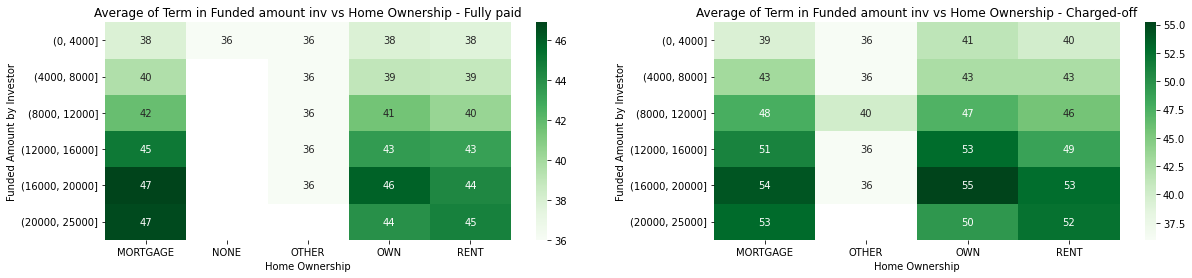

In [1422]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="term", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Term in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="term", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Term in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

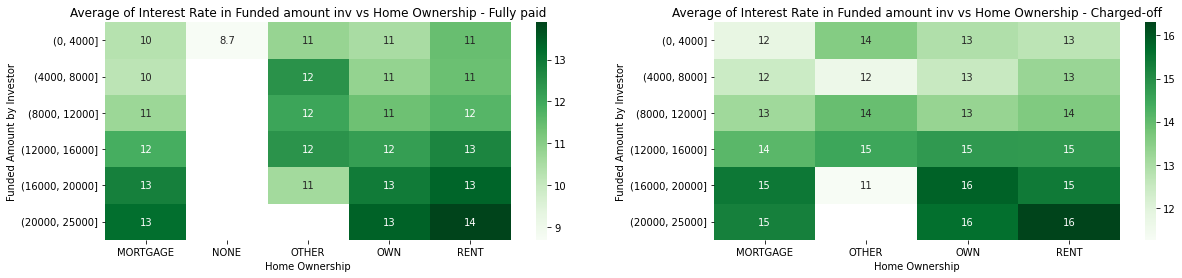

In [1423]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

# Observation
# As the fund amount increases we see a increase in interest rate 
# This could be a reason to make borrowers defaulters in these segment

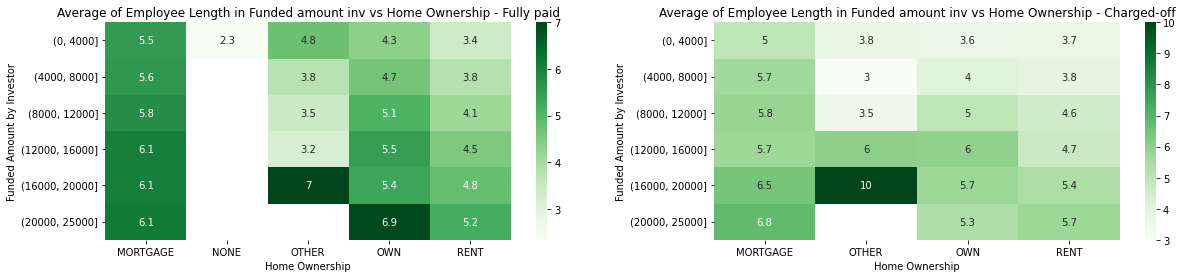

In [1424]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

# Observation
# For lesser Funded amount Inv , the average employee length is less in charged off category
# For higher Funded amount Inv , the average employee length is greater in charged off category

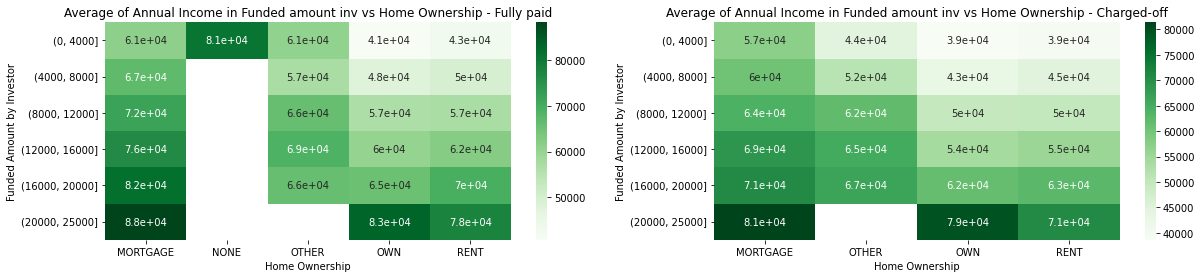

In [1425]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="annual_inc", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Annual Income in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="annual_inc", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Annual Income in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

# Observation

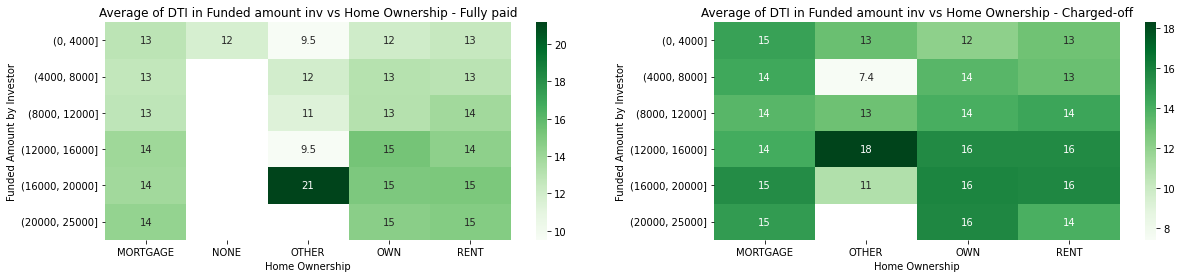

In [1645]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="dti", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of DTI in Funded amount inv vs Home Ownership - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="home_ownership", values="dti", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Home Ownership")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of DTI in Funded amount inv vs Home Ownership - Charged-off")

plt.show()

# Observation
# Borrower with Home ownership as 'Others' and Funded_amnt_inv as 12K - 16K tends to fully pay only if avg DTI is less as 9.5.
# Higher avg DTI tends to default


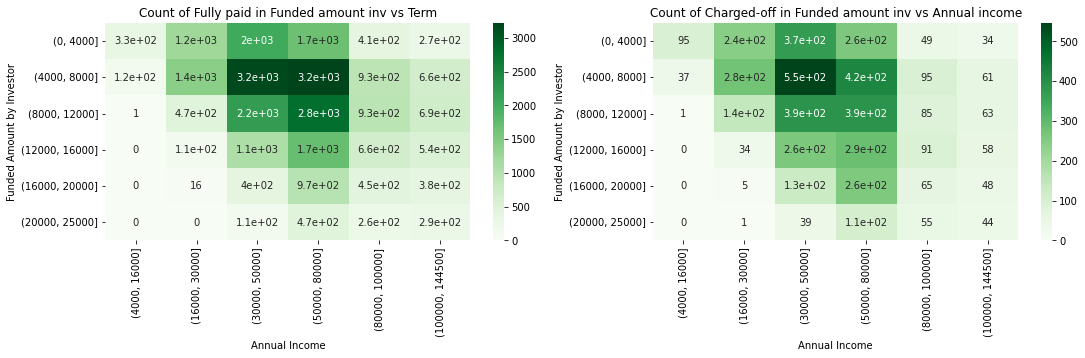

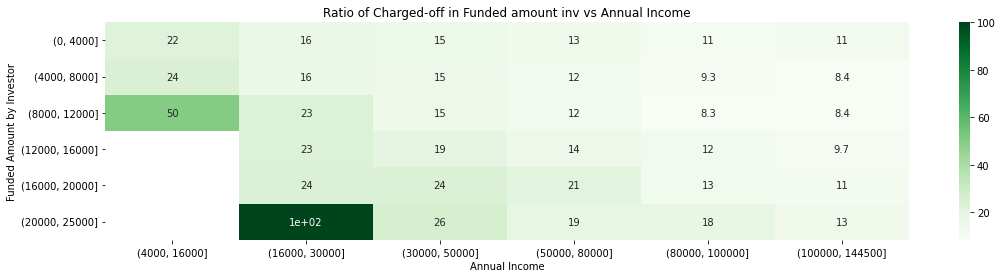

In [1427]:
# Comparison of Funded Amount by Investor and Annual Income
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="annual_inc_binned", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Annual Income")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Term")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="annual_inc_binned", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Annual Income")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Annual income")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Annual Income")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Annual Income")

plt.show()

# Observation
# Borrower with Lower Annual income and higher Funded_amnt_inv tend to default

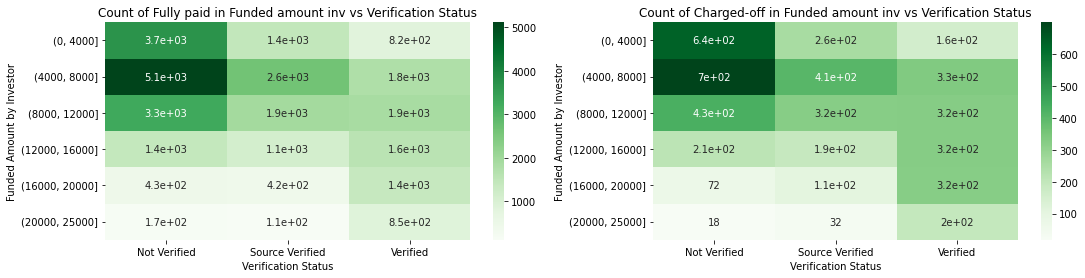

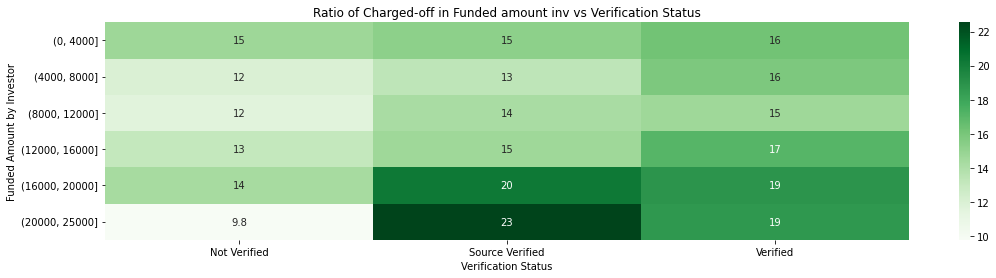

In [1428]:
# Comparison of Funded Amount by Investor and Verification status
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Verification Status")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Verification Status")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Verification Status")

plt.show()

# Observation
# Borrower with Verification status as 'Source Verified' and 'Verified' tends to default more with Funded_amnt_inv in 16K-25K

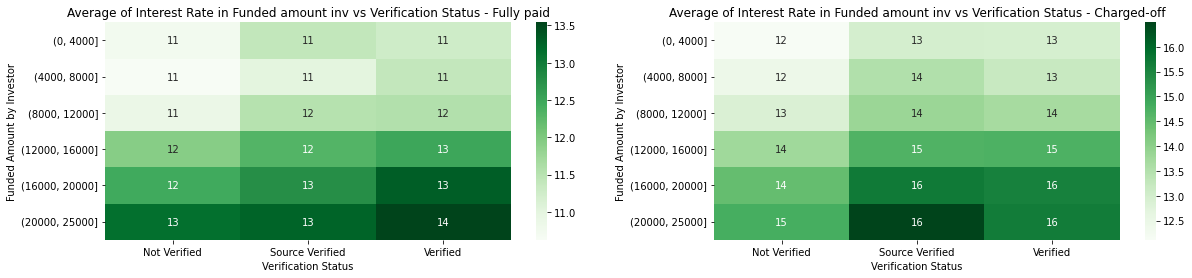

In [1429]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Verification Status - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Verification Status - Charged-off")

plt.show()

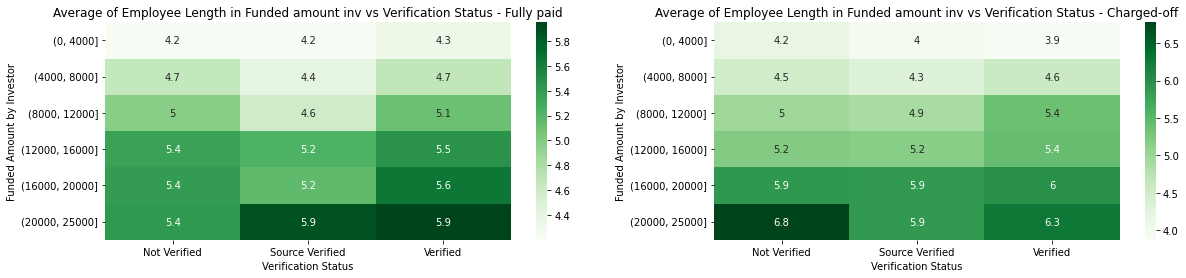

In [1430]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Verification Status - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Verification Status - Charged-off")

plt.show()

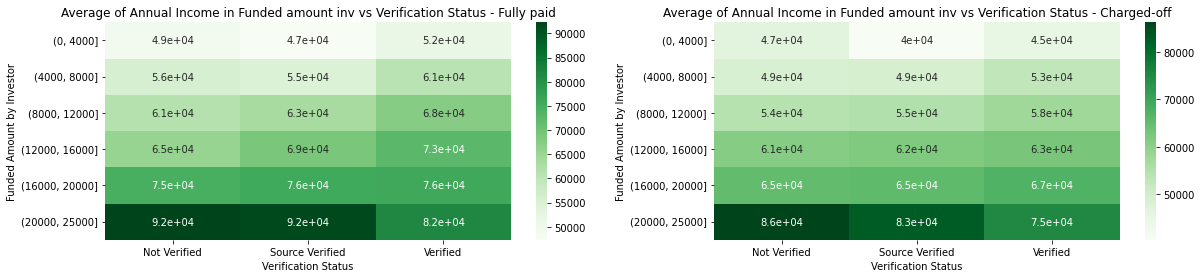

In [1431]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="annual_inc", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Annual Income in Funded amount inv vs Verification Status - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="annual_inc", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Annual Income in Funded amount inv vs Verification Status - Charged-off")

plt.show()

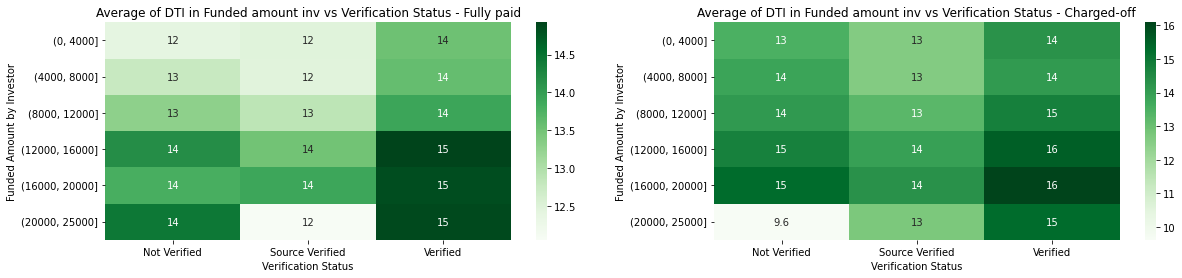

In [1432]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="dti", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of DTI in Funded amount inv vs Verification Status - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="verification_status", values="dti", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Verification Status")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of DTI in Funded amount inv vs Verification Status - Charged-off")

plt.show()

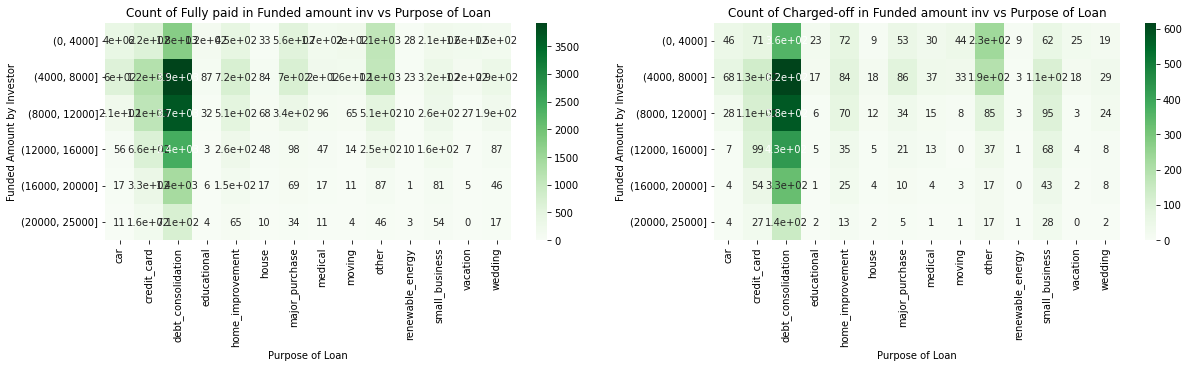

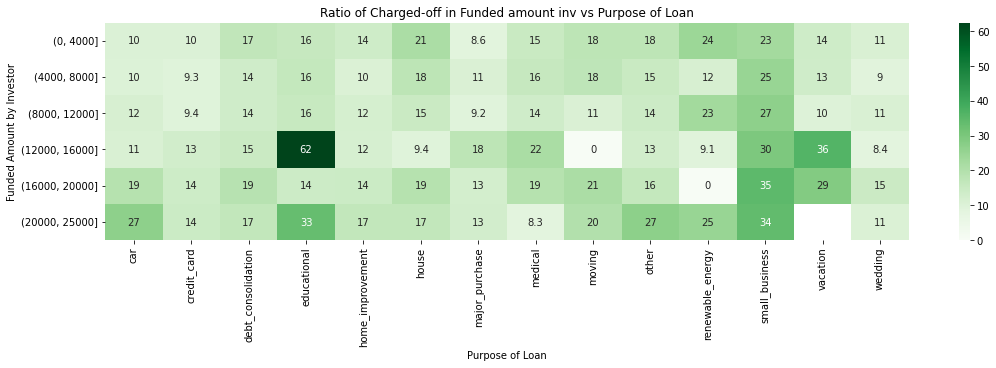

In [1433]:
# Comparison of Funded Amount by Investor and Purpose of Loan
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs Purpose of Loan")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs Purpose of Loan")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs Purpose of Loan")

plt.show()

# Observation
# Borrower with Education loan tends to default more with Funded_amnt_inv in 12K-16K and 20K-25K range
# Borrower with Vacation loan tends to default more with Funded_amnt_inv in 12K-20K range
# Borrower with Small Business and Car loan tends to default more with Funded_amnt_inv in 16K-25K range

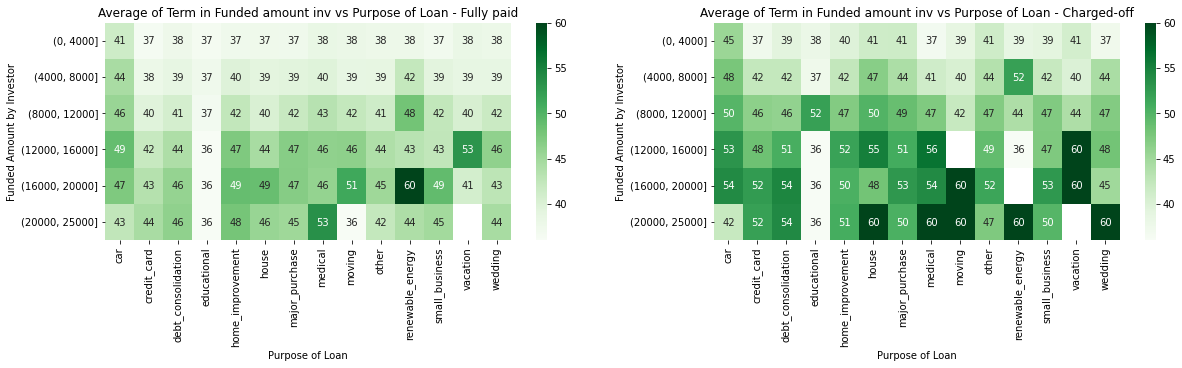

In [1434]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="term", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Term in Funded amount inv vs Purpose of Loan - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="term", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Term in Funded amount inv vs Purpose of Loan - Charged-off")

plt.show()

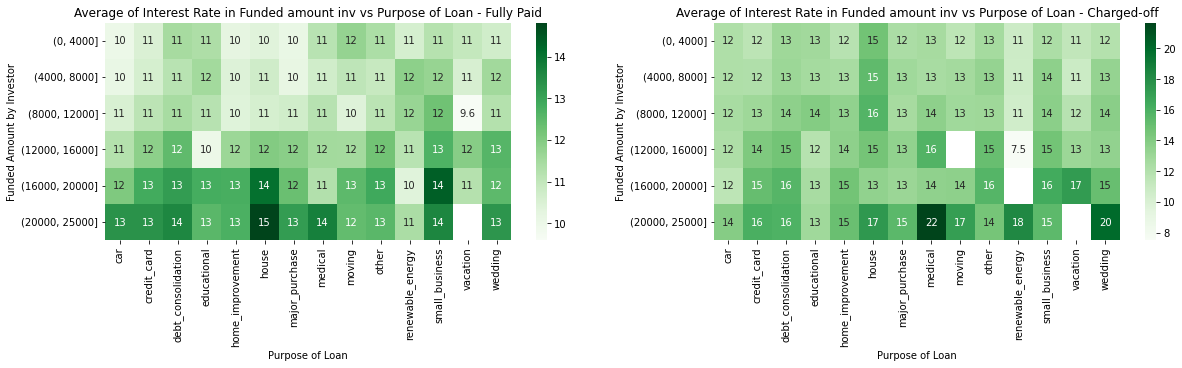

In [1435]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Purpose of Loan - Fully Paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="int_rate", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Interest Rate in Funded amount inv vs Purpose of Loan - Charged-off")

plt.show()

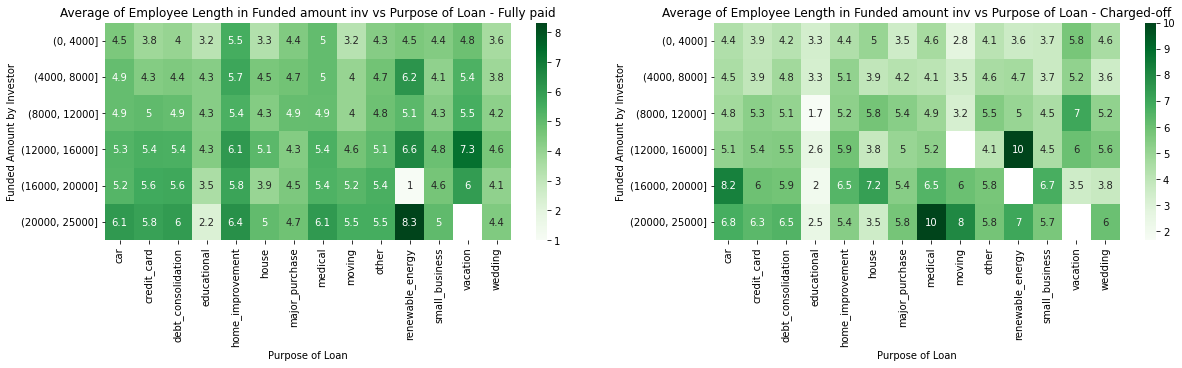

In [1436]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Purpose of Loan - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="emp_length", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Employee Length in Funded amount inv vs Purpose of Loan - Charged-off")

plt.show()

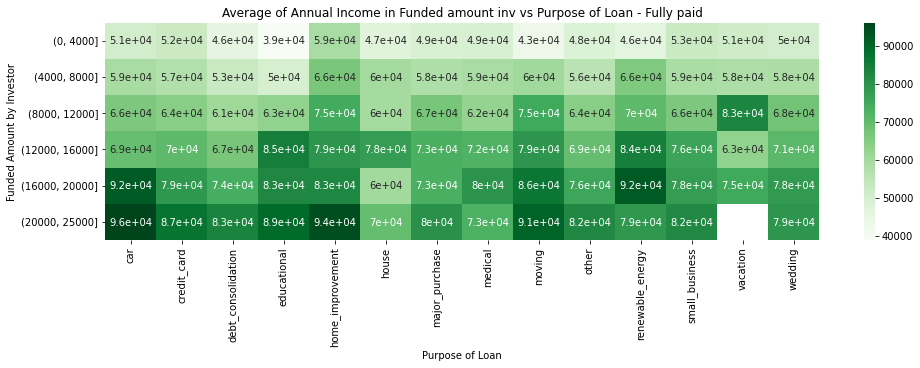

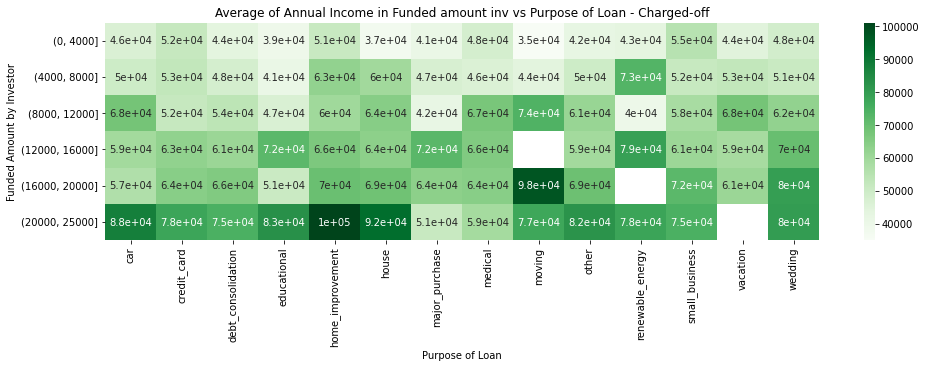

In [1437]:
plt.figure(figsize=[16,4])
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="annual_inc", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Annual Income in Funded amount inv vs Purpose of Loan - Fully paid")
plt.show()

plt.figure(figsize=[16,4])
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="annual_inc", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of Annual Income in Funded amount inv vs Purpose of Loan - Charged-off")
plt.show()

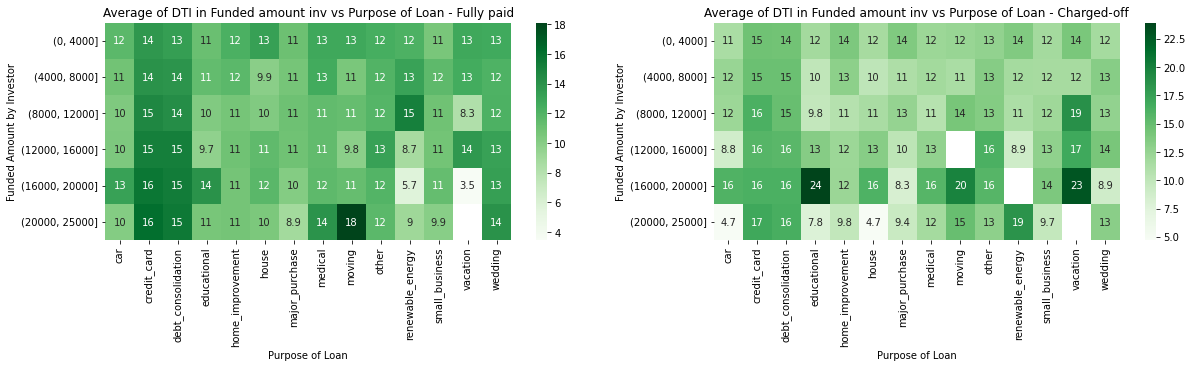

In [1438]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="dti", aggfunc='mean')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of DTI in Funded amount inv vs Purpose of Loan - Fully paid")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="purpose", values="dti", aggfunc='mean')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("Purpose of Loan")
plt.ylabel("Funded Amount by Investor")
plt.title("Average of DTI in Funded amount inv vs Purpose of Loan - Charged-off")

plt.show()

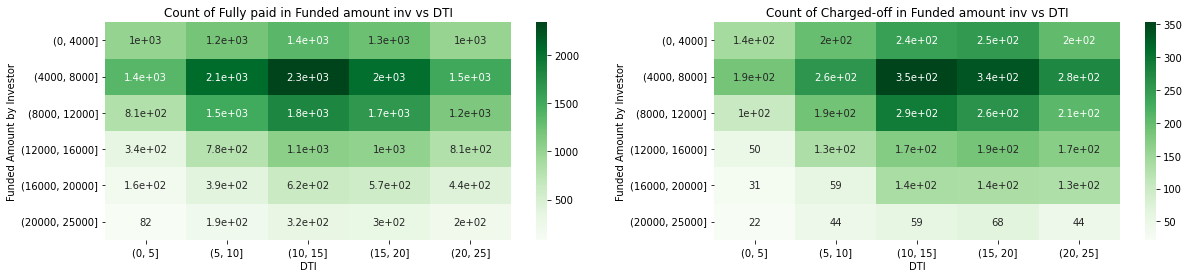

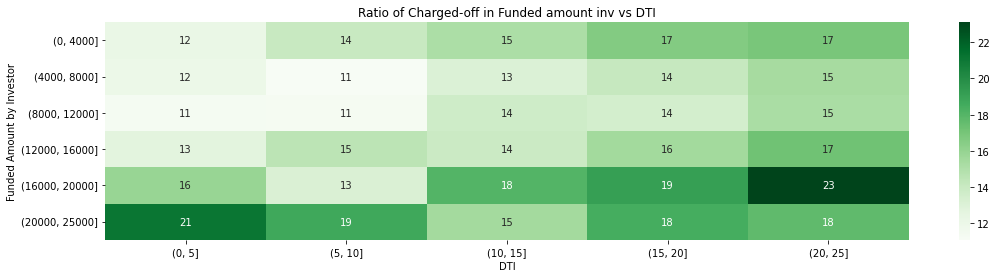

In [1439]:
# Comparison of Funded Amount by Investor and DTI
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
pivotDf1 = pd.pivot_table(data=PaidLoanDF, index="funded_amnt_inv_binned", columns="dti_binned", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf1,cmap="Greens",annot=True)
plt.xlabel("DTI")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Fully paid in Funded amount inv vs DTI")

plt.subplot(1,2,2)
pivotDf2 = pd.pivot_table(data=chargedOffLoanDF, index="funded_amnt_inv_binned", columns="dti_binned", values="loan_status", aggfunc='count')
sns.heatmap(pivotDf2,cmap="Greens",annot=True)
plt.xlabel("DTI")
plt.ylabel("Funded Amount by Investor")
plt.title("Count of Charged-off in Funded amount inv vs DTI")

plt.show()

plt.figure(figsize=[18,4])
ratioDf = round(pivotDf2 / ( pivotDf1 + pivotDf2) * 100, 2)
sns.heatmap(ratioDf,cmap="Greens",annot=True)
plt.xlabel("DTI")
plt.ylabel("Funded Amount by Investor")
plt.title("Ratio of Charged-off in Funded amount inv vs DTI")

plt.show()

# Observation
# Borrower with DTI in 20-25 tends to default more with Funded_amnt_inv in 16K-20K range
# Borrower with DTI in 0-10 tends to default more with Funded_amnt_inv in 20K-25K range

##### Distribution with annual_inc with other variables
##### For this we have to use annual_inc_binned, then a pivot table is created with value as count of borrowers accros categories and a heat map is ploted


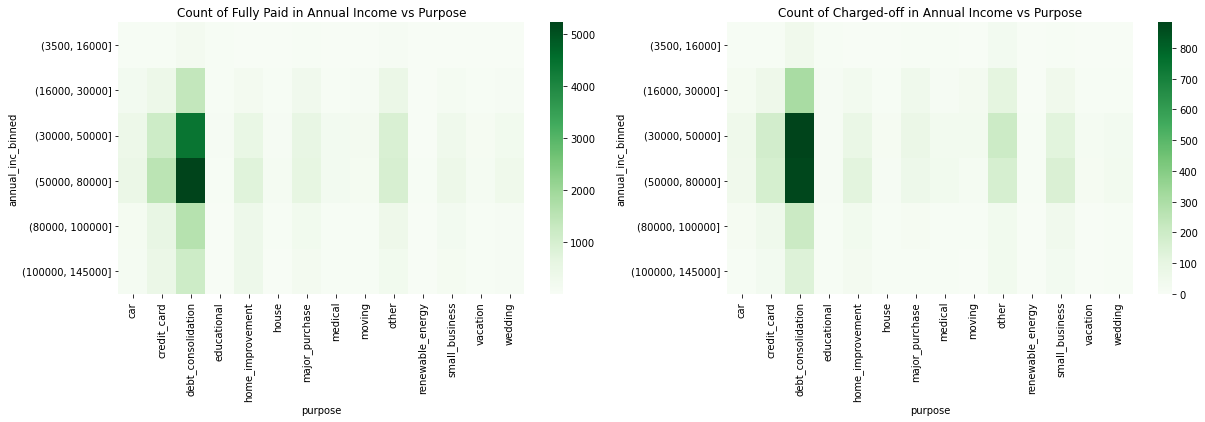

In [1827]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

pivotDf = PaidLoanDF[["annual_inc_binned","purpose","int_rate"]].pivot_table(index=["annual_inc_binned"],columns=["purpose"],aggfunc='count')
arr =[]
for i in range(0,14):
    arr.append(pivotDf.columns[i][1])
pivotDf.columns = [arr]
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[0])
s.set_xlabel("purpose")
s.set_title("Count of Fully Paid in Annual Income vs Purpose")

pivotDf = pd.pivot_table(data=chargedOffLoanDF,index=["annual_inc_binned"],columns=["purpose"],values=["int_rate"],aggfunc='count')
arr =[]
for i in range(0,14):
    arr.append(pivotDf.columns[i][1])
pivotDf.columns = [arr]
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[1])
s.set_xlabel("purpose")
s.set_title("Count of Charged-off in Annual Income vs Purpose")
plt.show()

#Observation

# Borrowers with an annual inc of 30k-50k,50k-80k request loan for debt consolidation a lot 
# and thereby the no of defaulters are also more here

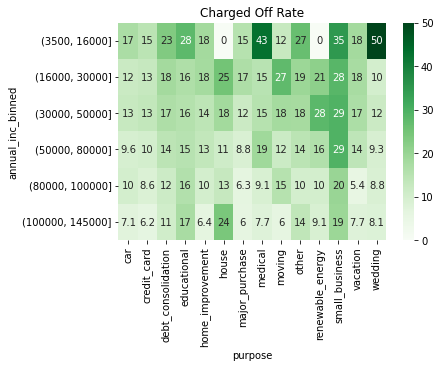

In [1833]:
# Here we will find the rate of defaulters based on annual inc and purpose

pivotDf_paid = pd.pivot_table(data=PaidLoanDF,index="annual_inc_binned",columns="purpose", values="int_rate", aggfunc='count')
pivotDf_default = pd.pivot_table(data=chargedOffLoanDF,index="annual_inc_binned",columns="purpose",values="int_rate",aggfunc='count')
pivotDf_rate = (pivotDf_default/(pivotDf_paid + pivotDf_default)*100).round(2)
s = sns.heatmap(pivotDf_rate,cmap="Greens",annot=True)
s.set_xlabel("purpose")
s.set_title("Charged Off Rate")
plt.show()

#Observations

# What we can see here is that borrowers with annual inc less than 80K who request loan for small business 
# have more 30% defaulters
# We can also observe such high rates in following combinations as well:
# Educational - 4k-16k\
# Renewable energy - 30k-50k\
# Using this information it is possible to set a min limit to annual inc to provide the loan

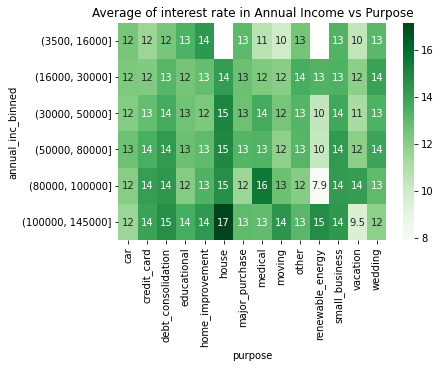

In [1834]:
# With mean interest rate
pivotDf_int_rate_mean = pd.pivot_table(data=chargedOffLoanDF,index="annual_inc_binned",columns="purpose",values="int_rate",aggfunc='mean')
s = sns.heatmap(pivotDf_int_rate_mean,cmap="Greens",annot=True)
s.set_xlabel("purpose")
s.set_title("Average of interest rate in Annual Income vs Purpose")
plt.show()

# Observation
# The reason for 23% defaulters in category annual inc 100k-145k 
# and purpose house, is due to the high interest rate

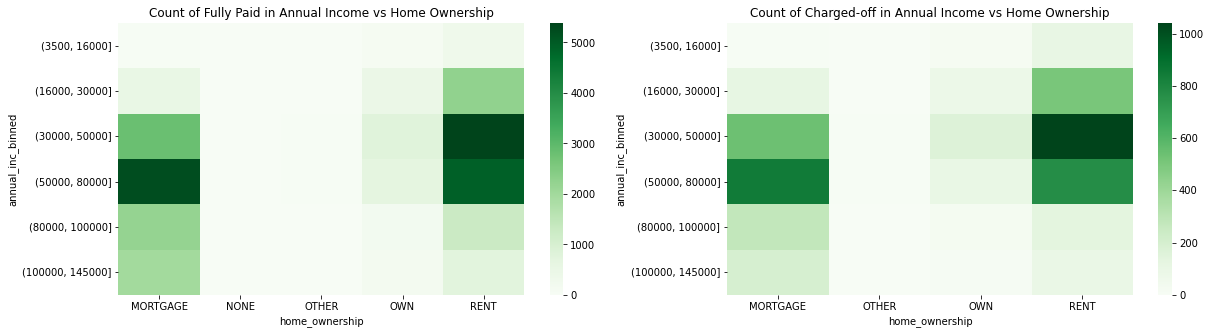

In [1831]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

pivotDf = pd.pivot_table(data=PaidLoanDF,index="annual_inc_binned",columns="home_ownership",values="int_rate", aggfunc='count')
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[0])
s.set_xlabel("home_ownership")
s.set_title("Count of Fully Paid in Annual Income vs Home Ownership")

pivotDf = pd.pivot_table(data=chargedOffLoanDF,index="annual_inc_binned",columns="home_ownership",values="int_rate",aggfunc='count')
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[1])
s.set_xlabel("home_ownership")
s.set_title("Count of Charged-off in Annual Income vs Home Ownership")
plt.show()

#Observation:

# We can see that in both cases fully paid and charged off the inc group b/w 30K-50K 
# who pay mortgage or live in rented home borrow loans more.


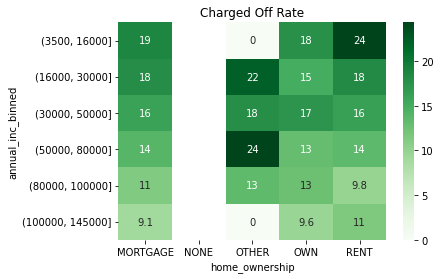

In [1835]:
# Here we will find the rate of defaulters based on annual income and home ownership
pivotDf_paid = pd.pivot_table(data=PaidLoanDF,index="annual_inc_binned",columns="home_ownership",values="int_rate", aggfunc='count')
pivotDf_default = pd.pivot_table(data=chargedOffLoanDF,index="annual_inc_binned",columns="home_ownership",values="int_rate",aggfunc='count')
pivotDf_rate = (pivotDf_default/(pivotDf_paid + pivotDf_default)*100).round(2)
s = sns.heatmap(pivotDf_rate,cmap="Greens",annot=True)
s.set_xlabel("home_ownership")
s.set_title("Charged Off Rate")
plt.show()

#Observations:

# Rate of defaulters is more (appx 24%) with home_ownership rented and annual inc 4K-16K
# The same is observed with home_ownership other and income 16K-30K & 50K-80K 
# In the category rent and mortgage the chances of defaulting is more for borrowers less that 50K annual income 
# with rates b/w 15-24

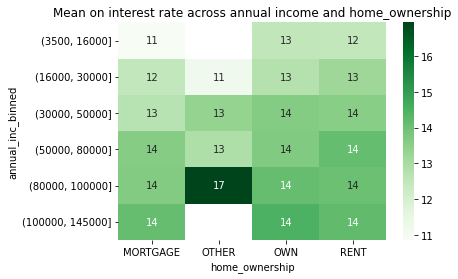

In [1836]:
# With mean interest rate
pivotDf_int_rate_mean = pd.pivot_table(data=chargedOffLoanDF,index="annual_inc_binned",columns="home_ownership",values="int_rate",aggfunc='mean')
s = sns.heatmap(pivotDf_int_rate_mean,cmap="Greens",annot=True)
s.set_xlabel("home_ownership")
s.set_title("Mean on interest rate across annual income and home_ownership")
plt.show()

#Observation

#The mean interest rate is more for home ownership other and annual income 80K-100K